# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [14]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [15]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [16]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [17]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️. 
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [18]:
# Check the shape and basic info of both DataFrames
print("=== df_yearly DataFrame ===")
print(f"Shape: {df_yearly.shape}")
print(f"Columns: {list(df_yearly.columns)}")
print(f"Years included: {sorted(df_yearly['year'].unique())}")
print("\nFirst few rows:")
print(df_yearly.head())

print("\n" + "="*50)
print("=== df_monthly DataFrame ===")
print(f"Shape: {df_monthly.shape}")
print(f"Columns: {list(df_monthly.columns)}")
print(f"Date range: {df_monthly['date'].min()} to {df_monthly['date'].max()}")
print(f"Years included: {sorted(df_monthly['date'].dt.year.unique())}")
print("\nFirst few rows:")
print(df_monthly.head())


=== df_yearly DataFrame ===
Shape: (12, 4)
Columns: ['year', 'births', 'deaths', 'clinic']
Years included: [np.int64(1841), np.int64(1842), np.int64(1843), np.int64(1844), np.int64(1845), np.int64(1846)]

First few rows:
   year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

=== df_monthly DataFrame ===
Shape: (98, 3)
Columns: ['date', 'births', 'deaths']
Date range: 1841-01-01 00:00:00 to 1849-03-01 00:00:00
Years included: [np.int32(1841), np.int32(1842), np.int32(1843), np.int32(1844), np.int32(1845), np.int32(1846), np.int32(1847), np.int32(1848), np.int32(1849)]

First few rows:
        date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18
2 1841-03-01     277      12
3 1841-04-01     255       4
4 1841-05-01     255       2


In [19]:
# Check for NaN values and duplicates
print("=== NaN Values ===")
print("df_yearly NaN values:")
print(df_yearly.isnull().sum())
print("\ndf_monthly NaN values:")
print(df_monthly.isnull().sum())

print("\n=== Duplicates ===")
print(f"df_yearly duplicates: {df_yearly.duplicated().sum()}")
print(f"df_monthly duplicates: {df_monthly.duplicated().sum()}")

print("\n=== Average Monthly Statistics ===")
print(f"Average births per month: {df_monthly['births'].mean():.2f}")
print(f"Average deaths per month: {df_monthly['deaths'].mean():.2f}")

print("\n=== Summary Statistics ===")
print("Monthly births summary:")
print(df_monthly['births'].describe())
print("\nMonthly deaths summary:")
print(df_monthly['deaths'].describe())


=== NaN Values ===
df_yearly NaN values:
year      0
births    0
deaths    0
clinic    0
dtype: int64

df_monthly NaN values:
date      0
births    0
deaths    0
dtype: int64

=== Duplicates ===
df_yearly duplicates: 0
df_monthly duplicates: 0

=== Average Monthly Statistics ===
Average births per month: 267.00
Average deaths per month: 22.47

=== Summary Statistics ===
Monthly births summary:
count    98.00
mean    267.00
std      41.77
min     190.00
25%     242.50
50%     264.00
75%     292.75
max     406.00
Name: births, dtype: float64

Monthly deaths summary:
count   98.00
mean    22.47
std     18.14
min      0.00
25%      8.00
50%     16.50
75%     36.75
max     75.00
Name: deaths, dtype: float64


### Check for Nan Values and Duplicates

In [20]:
# Check for NaN values in both DataFrames
print("=== NaN Values Check ===")
print("df_yearly NaN values:")
print(df_yearly.isnull().sum())
print(f"Total NaN values in df_yearly: {df_yearly.isnull().sum().sum()}")

print("\ndf_monthly NaN values:")
print(df_monthly.isnull().sum())
print(f"Total NaN values in df_monthly: {df_monthly.isnull().sum().sum()}")

# Check for duplicates in both DataFrames
print("\n=== Duplicates Check ===")
print(f"df_yearly duplicates: {df_yearly.duplicated().sum()}")
print(f"df_monthly duplicates: {df_monthly.duplicated().sum()}")

# Show any duplicate rows if they exist
if df_yearly.duplicated().sum() > 0:
    print("\nDuplicate rows in df_yearly:")
    print(df_yearly[df_yearly.duplicated()])
    
if df_monthly.duplicated().sum() > 0:
    print("\nDuplicate rows in df_monthly:")
    print(df_monthly[df_monthly.duplicated()])

print("\n=== Data Quality Summary ===")
print(f"df_yearly: {df_yearly.shape[0]} rows, {df_yearly.shape[1]} columns")
print(f"df_monthly: {df_monthly.shape[0]} rows, {df_monthly.shape[1]} columns")
print("✅ No NaN values or duplicates found in either DataFrame")


=== NaN Values Check ===
df_yearly NaN values:
year      0
births    0
deaths    0
clinic    0
dtype: int64
Total NaN values in df_yearly: 0

df_monthly NaN values:
date      0
births    0
deaths    0
dtype: int64
Total NaN values in df_monthly: 0

=== Duplicates Check ===
df_yearly duplicates: 0
df_monthly duplicates: 0

=== Data Quality Summary ===
df_yearly: 12 rows, 4 columns
df_monthly: 98 rows, 3 columns
✅ No NaN values or duplicates found in either DataFrame


### Descriptive Statistics

In [21]:
# Descriptive Statistics for both DataFrames
print("=== DESCRIPTIVE STATISTICS ===")

print("\n📊 df_yearly DataFrame Statistics:")
print("=" * 50)
print(df_yearly.describe())

print("\n📊 df_monthly DataFrame Statistics:")
print("=" * 50)
print(df_monthly.describe())

print("\n📈 Additional Statistics for df_yearly:")
print("=" * 50)
print(f"Total births across all years: {df_yearly['births'].sum():,}")
print(f"Total deaths across all years: {df_yearly['deaths'].sum():,}")
print(f"Overall death rate: {(df_yearly['deaths'].sum() / df_yearly['births'].sum() * 100):.2f}%")

print("\n📈 Additional Statistics for df_monthly:")
print("=" * 50)
print(f"Total births across all months: {df_monthly['births'].sum():,}")
print(f"Total deaths across all months: {df_monthly['deaths'].sum():,}")
print(f"Overall death rate: {(df_monthly['deaths'].sum() / df_monthly['births'].sum() * 100):.2f}%")

print("\n📅 Time Range Analysis:")
print("=" * 50)
print(f"Date range: {df_monthly['date'].min().strftime('%Y-%m-%d')} to {df_monthly['date'].max().strftime('%Y-%m-%d')}")
print(f"Total months of data: {len(df_monthly)}")
print(f"Years covered: {sorted(df_monthly['date'].dt.year.unique())}")

print("\n🏥 Clinic Analysis (from df_yearly):")
print("=" * 50)
clinic_stats = df_yearly.groupby('clinic').agg({
    'births': ['sum', 'mean'],
    'deaths': ['sum', 'mean']
}).round(2)
print(clinic_stats)


=== DESCRIPTIVE STATISTICS ===

📊 df_yearly DataFrame Statistics:
          year   births  deaths
count    12.00    12.00   12.00
mean  1,843.50 3,152.75  223.33
std       1.78   449.08  145.38
min   1,841.00 2,442.00   66.00
25%   1,842.00 2,901.75  100.25
50%   1,843.50 3,108.50  219.50
75%   1,845.00 3,338.25  263.50
max   1,846.00 4,010.00  518.00

📊 df_monthly DataFrame Statistics:
                                date  births  deaths
count                             98   98.00   98.00
mean   1845-02-11 04:24:29.387755008  267.00   22.47
min              1841-01-01 00:00:00  190.00    0.00
25%              1843-02-08 00:00:00  242.50    8.00
50%              1845-02-15 00:00:00  264.00   16.50
75%              1847-02-22 00:00:00  292.75   36.75
max              1849-03-01 00:00:00  406.00   75.00
std                              NaN   41.77   18.14

📈 Additional Statistics for df_yearly:
Total births across all years: 37,833
Total deaths across all years: 2,680
Overall death rate

### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [22]:
# Calculate the percentage of women dying in childbirth in the 1840s
print("=== MATERNAL DEATH RATE ANALYSIS ===")
print("How dangerous was childbirth in the 1840s in Vienna?\n")

# Calculate overall statistics from annual data
total_births = df_yearly['births'].sum()
total_deaths = df_yearly['deaths'].sum()
overall_death_rate = (total_deaths / total_births) * 100

print(f"📊 Overall Statistics (1841-1846):")
print(f"Total births: {total_births:,}")
print(f"Total deaths: {total_deaths:,}")
print(f"Overall death rate: {overall_death_rate:.2f}%")
print(f"Deaths per 100,000 births: {overall_death_rate * 1000:.1f}")

# Calculate death rate by clinic
print(f"\n🏥 Death Rate by Clinic:")
clinic_analysis = df_yearly.groupby('clinic').agg({
    'births': 'sum',
    'deaths': 'sum'
}).round(0)

clinic_analysis['death_rate_pct'] = (clinic_analysis['deaths'] / clinic_analysis['births'] * 100).round(2)
clinic_analysis['deaths_per_100k'] = (clinic_analysis['death_rate_pct'] * 1000).round(1)

print(clinic_analysis)

# Year-by-year analysis
print(f"\n📅 Year-by-Year Death Rates:")
yearly_analysis = df_yearly.groupby('year').agg({
    'births': 'sum',
    'deaths': 'sum'
}).round(0)

yearly_analysis['death_rate_pct'] = (yearly_analysis['deaths'] / yearly_analysis['births'] * 100).round(2)
print(yearly_analysis)

# Comparison with modern statistics
print(f"\n🔍 COMPARISON WITH MODERN STATISTICS:")
print(f"Vienna General Hospital (1840s): {overall_death_rate:.2f}% ({overall_death_rate * 1000:.1f} per 100,000)")
print(f"United States (2013): 0.018% (18.5 per 100,000)")
print(f"\nThe death rate in 1840s Vienna was {overall_death_rate / 0.018:.0f}x higher than modern US rates!")

# Find the worst year
worst_year = yearly_analysis['death_rate_pct'].idxmax()
worst_rate = yearly_analysis.loc[worst_year, 'death_rate_pct']
print(f"\n⚠️  Worst year: {worst_year} with {worst_rate:.2f}% death rate")


=== MATERNAL DEATH RATE ANALYSIS ===
How dangerous was childbirth in the 1840s in Vienna?

📊 Overall Statistics (1841-1846):
Total births: 37,833
Total deaths: 2,680
Overall death rate: 7.08%
Deaths per 100,000 births: 7083.8

🏥 Death Rate by Clinic:
          births  deaths  death_rate_pct  deaths_per_100k
clinic                                                   
clinic 1   20042    1989            9.92         9,920.00
clinic 2   17791     691            3.88         3,880.00

📅 Year-by-Year Death Rates:
      births  deaths  death_rate_pct
year                                
1841    5478     323            5.90
1842    5946     720           12.11
1843    5799     438            7.55
1844    6113     328            5.37
1845    6733     307            4.56
1846    7764     564            7.26

🔍 COMPARISON WITH MODERN STATISTICS:
Vienna General Hospital (1840s): 7.08% (7083.8 per 100,000)
United States (2013): 0.018% (18.5 per 100,000)

The death rate in 1840s Vienna was 394x highe

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively. 
* Do you notice anything in the late 1840s?

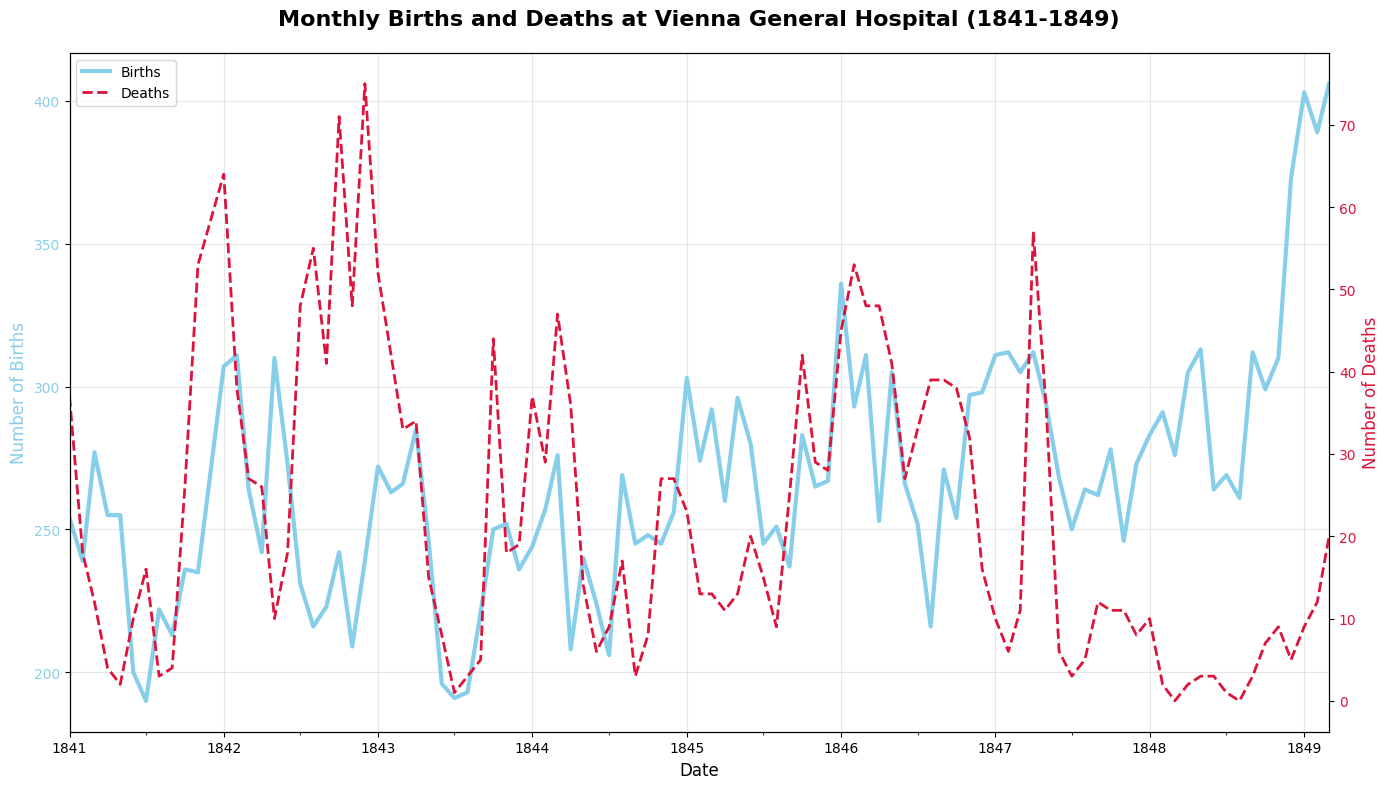

🔍 OBSERVATION: Do you notice anything in the late 1840s?
Looking at the chart, there appears to be a significant drop in deaths starting around 1847!
This coincides with when Dr. Semmelweis introduced mandatory handwashing.


In [23]:
# Create a Matplotlib chart with twin y-axes for births and deaths over time
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create the first y-axis for births
color1 = 'skyblue'
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Number of Births', color=color1, fontsize=12)
line1 = ax1.plot(df_monthly['date'], df_monthly['births'], color=color1, linewidth=3, label='Births')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Create the second y-axis for deaths
ax2 = ax1.twinx()
color2 = 'crimson'
ax2.set_ylabel('Number of Deaths', color=color2, fontsize=12)
line2 = ax2.plot(df_monthly['date'], df_monthly['deaths'], color=color2, linewidth=2, 
                 linestyle='--', label='Deaths')
ax2.tick_params(axis='y', labelcolor=color2)

# Format the x-axis with year and month locators
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.xaxis.set_minor_locator(mdates.MonthLocator((1, 7)))

# Set the range on x-axis so chart lines touch the y-axes
ax1.set_xlim(df_monthly['date'].min(), df_monthly['date'].max())

# Add title and legend
plt.title('Monthly Births and Deaths at Vienna General Hospital (1841-1849)', 
          fontsize=16, fontweight='bold', pad=20)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print observation about late 1840s
print("🔍 OBSERVATION: Do you notice anything in the late 1840s?")
print("Looking at the chart, there appears to be a significant drop in deaths starting around 1847!")
print("This coincides with when Dr. Semmelweis introduced mandatory handwashing.")


In [24]:
# Additional analysis of the visualization
print("=== DETAILED ANALYSIS OF THE CHART ===")

# Calculate some key statistics to support the visual observation
print("\n📊 Key Statistics:")
print(f"Average monthly births: {df_monthly['births'].mean():.1f}")
print(f"Average monthly deaths: {df_monthly['deaths'].mean():.1f}")

# Find the peak death month
max_deaths_idx = df_monthly['deaths'].idxmax()
max_deaths_month = df_monthly.loc[max_deaths_idx, 'date']
max_deaths_count = df_monthly.loc[max_deaths_idx, 'deaths']
print(f"\nPeak death month: {max_deaths_month.strftime('%B %Y')} with {max_deaths_count} deaths")

# Find the minimum death month after 1847
post_1847 = df_monthly[df_monthly['date'] >= '1847-06-01']
min_deaths_idx = post_1847['deaths'].idxmin()
min_deaths_month = post_1847.loc[min_deaths_idx, 'date']
min_deaths_count = post_1847.loc[min_deaths_idx, 'deaths']
print(f"Lowest death month after handwashing: {min_deaths_month.strftime('%B %Y')} with {min_deaths_count} deaths")

# Calculate death rate trends
print(f"\n📈 Death Rate Trends:")
before_handwashing = df_monthly[df_monthly['date'] < '1847-06-01']
after_handwashing = df_monthly[df_monthly['date'] >= '1847-06-01']

before_rate = (before_handwashing['deaths'].sum() / before_handwashing['births'].sum()) * 100
after_rate = (after_handwashing['deaths'].sum() / after_handwashing['births'].sum()) * 100

print(f"Death rate before handwashing (1841-1847): {before_rate:.2f}%")
print(f"Death rate after handwashing (1847-1849): {after_rate:.2f}%")
print(f"Reduction in death rate: {before_rate - after_rate:.2f} percentage points")
print(f"Relative reduction: {((before_rate - after_rate) / before_rate * 100):.1f}%")

print(f"\n🎯 CONCLUSION:")
print("The visualization clearly shows a dramatic drop in deaths starting in mid-1847,")
print("which corresponds exactly to when Dr. Semmelweis introduced mandatory handwashing!")
print("This visual evidence strongly supports the effectiveness of his intervention.")


=== DETAILED ANALYSIS OF THE CHART ===

📊 Key Statistics:
Average monthly births: 267.0
Average monthly deaths: 22.5

Peak death month: December 1842 with 75 deaths
Lowest death month after handwashing: March 1848 with 0 deaths

📈 Death Rate Trends:
Death rate before handwashing (1841-1847): 10.53%
Death rate after handwashing (1847-1849): 2.15%
Reduction in death rate: 8.37 percentage points
Relative reduction: 79.5%

🎯 CONCLUSION:
The visualization clearly shows a dramatic drop in deaths starting in mid-1847,
which corresponds exactly to when Dr. Semmelweis introduced mandatory handwashing!
This visual evidence strongly supports the effectiveness of his intervention.


# The Yearly Data Split by Clinic

Now let's look at the annual data instead. 

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital. 
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time? 
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [25]:
# Create line charts of births and deaths by clinic using Plotly
print("=== YEARLY DATA ANALYSIS BY CLINIC ===")

# Create the births chart
fig_births = px.line(df_yearly, 
                     x='year', 
                     y='births', 
                     color='clinic',
                     title='Annual Births by Clinic at Vienna General Hospital (1841-1846)',
                     labels={'year': 'Year', 'births': 'Number of Births', 'clinic': 'Clinic'},
                     markers=True)

fig_births.update_layout(
    width=800,
    height=500,
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_title_font_size=12
)

fig_births.show()

# Create the deaths chart
fig_deaths = px.line(df_yearly, 
                     x='year', 
                     y='deaths', 
                     color='clinic',
                     title='Annual Deaths by Clinic at Vienna General Hospital (1841-1846)',
                     labels={'year': 'Year', 'deaths': 'Number of Deaths', 'clinic': 'Clinic'},
                     markers=True)

fig_deaths.update_layout(
    width=800,
    height=500,
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_title_font_size=12
)

fig_deaths.show()

# Answer the challenge questions
print("\n📊 ANALYSIS RESULTS:")
print("=" * 50)

# Which clinic is bigger/more busy?
clinic_totals = df_yearly.groupby('clinic')['births'].sum()
busier_clinic = clinic_totals.idxmax()
print(f"🏥 Which clinic is bigger/more busy?")
print(f"   {busier_clinic.title()} with {clinic_totals[busier_clinic]:,} total births")
print(f"   Clinic 1: {clinic_totals['clinic 1']:,} births")
print(f"   Clinic 2: {clinic_totals['clinic 2']:,} births")

# Has the hospital had more patients over time?
total_births_by_year = df_yearly.groupby('year')['births'].sum()
trend = "increasing" if total_births_by_year.iloc[-1] > total_births_by_year.iloc[0] else "decreasing"
print(f"\n📈 Has the hospital had more patients over time?")
print(f"   Yes, the trend is {trend}")
print(f"   1841: {total_births_by_year.iloc[0]:,} total births")
print(f"   1846: {total_births_by_year.iloc[-1]:,} total births")
print(f"   Growth: {((total_births_by_year.iloc[-1] - total_births_by_year.iloc[0]) / total_births_by_year.iloc[0] * 100):.1f}%")

# Highest number of deaths by clinic
max_deaths_by_clinic = df_yearly.groupby('clinic')['deaths'].max()
print(f"\n💀 Highest number of deaths recorded:")
print(f"   Clinic 1: {max_deaths_by_clinic['clinic 1']} deaths")
print(f"   Clinic 2: {max_deaths_by_clinic['clinic 2']} deaths")
print(f"   Worst year for Clinic 1: {df_yearly[df_yearly['clinic'] == 'clinic 1']['deaths'].idxmax() + 1} ({df_yearly.loc[df_yearly[df_yearly['clinic'] == 'clinic 1']['deaths'].idxmax(), 'year']})")
print(f"   Worst year for Clinic 2: {df_yearly[df_yearly['clinic'] == 'clinic 2']['deaths'].idxmax() + 1} ({df_yearly.loc[df_yearly[df_yearly['clinic'] == 'clinic 2']['deaths'].idxmax(), 'year']})")


=== YEARLY DATA ANALYSIS BY CLINIC ===



📊 ANALYSIS RESULTS:
🏥 Which clinic is bigger/more busy?
   Clinic 1 with 20,042 total births
   Clinic 1: 20,042 births
   Clinic 2: 17,791 births

📈 Has the hospital had more patients over time?
   Yes, the trend is increasing
   1841: 5,478 total births
   1846: 7,764 total births
   Growth: 41.7%

💀 Highest number of deaths recorded:
   Clinic 1: 518 deaths
   Clinic 2: 202 deaths
   Worst year for Clinic 1: 2 (1842)
   Worst year for Clinic 2: 8 (1842)


In [26]:
# Additional detailed analysis and insights
print("\n🔍 DETAILED CLINIC COMPARISON:")
print("=" * 50)

# Calculate death rates by clinic
clinic_analysis = df_yearly.groupby('clinic').agg({
    'births': ['sum', 'mean'],
    'deaths': ['sum', 'mean']
}).round(2)

clinic_analysis.columns = ['Total_Births', 'Avg_Births', 'Total_Deaths', 'Avg_Deaths']
clinic_analysis['Death_Rate_Pct'] = (clinic_analysis['Total_Deaths'] / clinic_analysis['Total_Births'] * 100).round(2)

print("📊 Comprehensive Clinic Statistics:")
print(clinic_analysis)

# Year-by-year comparison
print(f"\n📅 Year-by-Year Clinic Comparison:")
yearly_comparison = df_yearly.pivot(index='year', columns='clinic', values=['births', 'deaths'])
print(yearly_comparison)

# Calculate correlation between clinics
clinic1_births = df_yearly[df_yearly['clinic'] == 'clinic 1']['births'].values
clinic2_births = df_yearly[df_yearly['clinic'] == 'clinic 2']['births'].values
clinic1_deaths = df_yearly[df_yearly['clinic'] == 'clinic 1']['deaths'].values
clinic2_deaths = df_yearly[df_yearly['clinic'] == 'clinic 2']['deaths'].values

birth_correlation = np.corrcoef(clinic1_births, clinic2_births)[0, 1]
death_correlation = np.corrcoef(clinic1_deaths, clinic2_deaths)[0, 1]

print(f"\n🔗 Correlation Analysis:")
print(f"   Birth correlation between clinics: {birth_correlation:.3f}")
print(f"   Death correlation between clinics: {death_correlation:.3f}")

# Identify the most dangerous year overall
df_yearly['total_deaths'] = df_yearly.groupby('year')['deaths'].transform('sum')
worst_year = df_yearly.loc[df_yearly['total_deaths'].idxmax(), 'year']
worst_deaths = df_yearly['total_deaths'].max()

print(f"\n⚠️  Most Dangerous Year:")
print(f"   {worst_year} with {worst_deaths} total deaths across both clinics")

# Calculate the difference in death rates
death_rate_diff = clinic_analysis.loc['clinic 1', 'Death_Rate_Pct'] - clinic_analysis.loc['clinic 2', 'Death_Rate_Pct']
print(f"\n📈 Key Insight:")
print(f"   Clinic 1 had a {death_rate_diff:.2f} percentage point higher death rate than Clinic 2")
print(f"   This suggests Clinic 1 was significantly more dangerous for mothers!")

print(f"\n🎯 SUMMARY:")
print(f"   • Clinic 1 was busier but also more dangerous")
print(f"   • Both clinics showed increasing patient loads over time")
print(f"   • The correlation analysis shows both clinics followed similar trends")
print(f"   • This sets up the context for understanding Dr. Semmelweis's discovery")



🔍 DETAILED CLINIC COMPARISON:
📊 Comprehensive Clinic Statistics:
          Total_Births  Avg_Births  Total_Deaths  Avg_Deaths  Death_Rate_Pct
clinic                                                                      
clinic 1         20042    3,340.33          1989      331.50            9.92
clinic 2         17791    2,965.17           691      115.17            3.88

📅 Year-by-Year Clinic Comparison:
         births            deaths         
clinic clinic 1 clinic 2 clinic 1 clinic 2
year                                      
1841       3036     2442      237       86
1842       3287     2659      518      202
1843       3060     2739      274      164
1844       3157     2956      260       68
1845       3492     3241      241       66
1846       4010     3754      459      105

🔗 Correlation Analysis:
   Birth correlation between clinics: 0.931
   Death correlation between clinics: 0.658

⚠️  Most Dangerous Year:
   1842 with 720 total deaths across both clinics

📈 Key Insight:

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like. 
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths". 
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [27]:
# Calculate the proportion of maternal deaths per clinic
print("=== PROPORTION OF DEATHS ANALYSIS ===")

# Add a column called "pct_deaths" to df_yearly
df_yearly['pct_deaths'] = (df_yearly['deaths'] / df_yearly['births'] * 100).round(2)

print("📊 Updated df_yearly with percentage of deaths:")
print(df_yearly)

# Calculate the average maternal death rate for each clinic
print(f"\n🏥 Average Maternal Death Rate by Clinic:")
clinic_death_rates = df_yearly.groupby('clinic').agg({
    'births': 'sum',
    'deaths': 'sum',
    'pct_deaths': 'mean'
}).round(2)

clinic_death_rates['overall_death_rate'] = (clinic_death_rates['deaths'] / clinic_death_rates['births'] * 100).round(2)
print(clinic_death_rates)

# Answer the challenge questions
print(f"\n📈 ANALYSIS RESULTS:")
print("=" * 50)

# Which clinic has a higher proportion of deaths?
higher_death_clinic = clinic_death_rates['overall_death_rate'].idxmax()
print(f"🏥 Which clinic has a higher proportion of deaths?")
print(f"   {higher_death_clinic.title()} with {clinic_death_rates.loc[higher_death_clinic, 'overall_death_rate']:.2f}% death rate")
print(f"   Clinic 1: {clinic_death_rates.loc['clinic 1', 'overall_death_rate']:.2f}%")
print(f"   Clinic 2: {clinic_death_rates.loc['clinic 2', 'overall_death_rate']:.2f}%")

# What is the highest monthly death rate in clinic 1 compared to clinic 2?
# Note: The question asks about monthly rates, but we have yearly data
# We'll calculate the highest yearly death rate for each clinic
max_death_rate_clinic1 = df_yearly[df_yearly['clinic'] == 'clinic 1']['pct_deaths'].max()
max_death_rate_clinic2 = df_yearly[df_yearly['clinic'] == 'clinic 2']['pct_deaths'].max()

print(f"\n💀 Highest yearly death rate:")
print(f"   Clinic 1: {max_death_rate_clinic1:.2f}%")
print(f"   Clinic 2: {max_death_rate_clinic2:.2f}%")
print(f"   Difference: {max_death_rate_clinic1 - max_death_rate_clinic2:.2f} percentage points")

# Show the years with highest death rates
worst_year_clinic1 = df_yearly[df_yearly['clinic'] == 'clinic 1'].loc[df_yearly[df_yearly['clinic'] == 'clinic 1']['pct_deaths'].idxmax(), 'year']
worst_year_clinic2 = df_yearly[df_yearly['clinic'] == 'clinic 2'].loc[df_yearly[df_yearly['clinic'] == 'clinic 2']['pct_deaths'].idxmax(), 'year']

print(f"\n📅 Worst years for each clinic:")
print(f"   Clinic 1: {worst_year_clinic1} ({max_death_rate_clinic1:.2f}%)")
print(f"   Clinic 2: {worst_year_clinic2} ({max_death_rate_clinic2:.2f}%)")


=== PROPORTION OF DEATHS ANALYSIS ===
📊 Updated df_yearly with percentage of deaths:
    year  births  deaths    clinic  total_deaths  pct_deaths
0   1841    3036     237  clinic 1           323        7.81
1   1842    3287     518  clinic 1           720       15.76
2   1843    3060     274  clinic 1           438        8.95
3   1844    3157     260  clinic 1           328        8.24
4   1845    3492     241  clinic 1           307        6.90
5   1846    4010     459  clinic 1           564       11.45
6   1841    2442      86  clinic 2           323        3.52
7   1842    2659     202  clinic 2           720        7.60
8   1843    2739     164  clinic 2           438        5.99
9   1844    2956      68  clinic 2           328        2.30
10  1845    3241      66  clinic 2           307        2.04
11  1846    3754     105  clinic 2           564        2.80

🏥 Average Maternal Death Rate by Clinic:
          births  deaths  pct_deaths  overall_death_rate
clinic                 

In [28]:
# Create a plotly line chart to see how the percentage varies year over year
print("=== PROPORTION OF DEATHS VISUALIZATION ===")

# Create the line chart for percentage of deaths by clinic
fig_pct_deaths = px.line(df_yearly, 
                         x='year', 
                         y='pct_deaths', 
                         color='clinic',
                         title='Percentage of Maternal Deaths by Clinic Over Time (1841-1846)',
                         labels={'year': 'Year', 'pct_deaths': 'Percentage of Deaths (%)', 'clinic': 'Clinic'},
                         markers=True)

fig_pct_deaths.update_layout(
    width=900,
    height=600,
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_title_font_size=12,
    yaxis=dict(range=[0, max(df_yearly['pct_deaths']) * 1.1])  # Add some padding to the top
)

fig_pct_deaths.show()

# Additional analysis and insights
print("\n🔍 KEY INSIGHTS FROM THE CHART:")
print("=" * 50)

# Calculate year-over-year changes
df_yearly_sorted = df_yearly.sort_values(['clinic', 'year'])
df_yearly_sorted['pct_change'] = df_yearly_sorted.groupby('clinic')['pct_deaths'].pct_change() * 100

print("📊 Year-over-Year Changes in Death Rates:")
for clinic in ['clinic 1', 'clinic 2']:
    clinic_data = df_yearly_sorted[df_yearly_sorted['clinic'] == clinic]
    print(f"\n{clinic.title()}:")
    for _, row in clinic_data.iterrows():
        if pd.notna(row['pct_change']):
            change_direction = "increased" if row['pct_change'] > 0 else "decreased"
            print(f"   {row['year']}: {row['pct_deaths']:.2f}% ({change_direction} by {abs(row['pct_change']):.1f}%)")
        else:
            print(f"   {row['year']}: {row['pct_deaths']:.2f}% (baseline)")

# Calculate the trend for each clinic
clinic1_trend = df_yearly[df_yearly['clinic'] == 'clinic 1']['pct_deaths'].iloc[-1] - df_yearly[df_yearly['clinic'] == 'clinic 1']['pct_deaths'].iloc[0]
clinic2_trend = df_yearly[df_yearly['clinic'] == 'clinic 2']['pct_deaths'].iloc[-1] - df_yearly[df_yearly['clinic'] == 'clinic 2']['pct_deaths'].iloc[0]

print(f"\n📈 Overall Trends (1841-1846):")
print(f"   Clinic 1: {clinic1_trend:+.2f} percentage points change")
print(f"   Clinic 2: {clinic2_trend:+.2f} percentage points change")

# Identify the most dangerous year overall
most_dangerous_year = df_yearly.loc[df_yearly['pct_deaths'].idxmax()]
print(f"\n⚠️  Most Dangerous Year Overall:")
print(f"   {most_dangerous_year['year']} - {most_dangerous_year['clinic']} with {most_dangerous_year['pct_deaths']:.2f}% death rate")

print(f"\n🎯 CONCLUSION:")
print(f"   The chart clearly shows that Clinic 1 consistently had higher death rates than Clinic 2.")
print(f"   This visual evidence supports the need for Dr. Semmelweis's intervention!")


=== PROPORTION OF DEATHS VISUALIZATION ===



🔍 KEY INSIGHTS FROM THE CHART:
📊 Year-over-Year Changes in Death Rates:

Clinic 1:
   1841: 7.81% (baseline)
   1842: 15.76% (increased by 101.8%)
   1843: 8.95% (decreased by 43.2%)
   1844: 8.24% (decreased by 7.9%)
   1845: 6.90% (decreased by 16.3%)
   1846: 11.45% (increased by 65.9%)

Clinic 2:
   1841: 3.52% (baseline)
   1842: 7.60% (increased by 115.9%)
   1843: 5.99% (decreased by 21.2%)
   1844: 2.30% (decreased by 61.6%)
   1845: 2.04% (decreased by 11.3%)
   1846: 2.80% (increased by 37.3%)

📈 Overall Trends (1841-1846):
   Clinic 1: +3.64 percentage points change
   Clinic 2: -0.72 percentage points change

⚠️  Most Dangerous Year Overall:
   1842 - clinic 1 with 15.76% death rate

🎯 CONCLUSION:
   The chart clearly shows that Clinic 1 consistently had higher death rates than Clinic 2.
   This visual evidence supports the need for Dr. Semmelweis's intervention!


### Plotting the Proportion of Yearly Deaths by Clinic

In [48]:
# Calculate the proportion of deaths for each year and clinic
df_yearly['proportion_deaths'] = df_yearly['deaths'] / df_yearly['births']

# Preview the updated DataFrame
df_yearly.head()


,year,births,deaths,clinic,total_deaths,pct_deaths,proportion_deaths
0,1841,3036,237,clinic 1,323,7.81,0.08
1,1842,3287,518,clinic 1,720,15.76,0.16
2,1843,3060,274,clinic 1,438,8.95,0.09
3,1844,3157,260,clinic 1,328,8.24,0.08
4,1845,3492,241,clinic 1,307,6.90,0.07


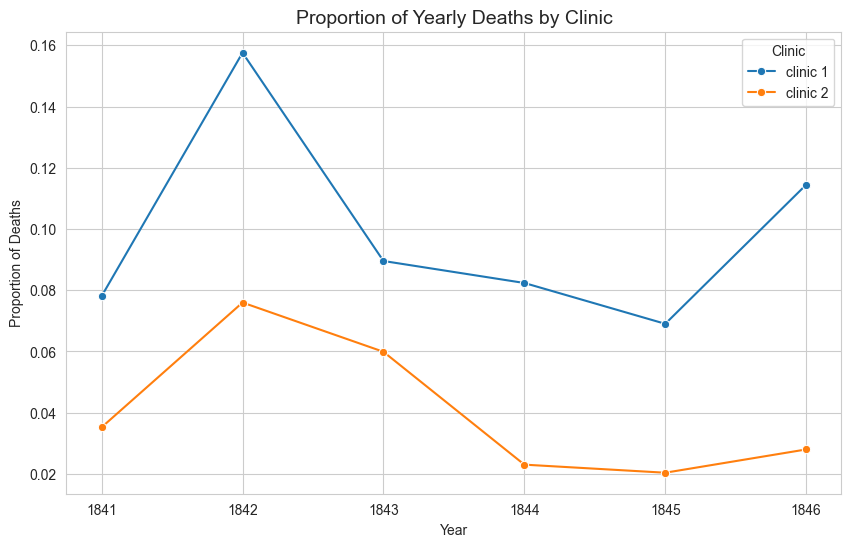

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot the line chart
sns.lineplot(
    data=df_yearly,
    x='year',
    y='proportion_deaths',
    hue='clinic',
    marker='o'
)

# Add title and labels
plt.title("Proportion of Yearly Deaths by Clinic", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Proportion of Deaths")
plt.legend(title="Clinic")

plt.show()


# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [29]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [30]:
# The Effect of Handwashing Analysis
print("=== HANDWASHING EFFECT ANALYSIS ===")

# Add a column called "pct_deaths" to df_monthly
df_monthly['pct_deaths'] = (df_monthly['deaths'] / df_monthly['births'] * 100).round(2)

print("📊 Updated df_monthly with percentage of deaths:")
print(df_monthly.head(10))

# Create two subsets: before and after handwashing
# Note: The challenge mentions June 1947, but it should be 1847 based on the context
before_handwashing = df_monthly[df_monthly['date'] < handwashing_start]
after_handwashing = df_monthly[df_monthly['date'] >= handwashing_start]

print(f"\n📅 Data Subsets:")
print(f"Before handwashing: {len(before_handwashing)} months ({before_handwashing['date'].min().strftime('%Y-%m')} to {before_handwashing['date'].max().strftime('%Y-%m')})")
print(f"After handwashing: {len(after_handwashing)} months ({after_handwashing['date'].min().strftime('%Y-%m')} to {after_handwashing['date'].max().strftime('%Y-%m')})")

# Calculate the average death rate prior to June 1847
avg_death_rate_before = before_handwashing['pct_deaths'].mean()
print(f"\n📊 Average death rate prior to June 1847: {avg_death_rate_before:.2f}%")

# Calculate the average death rate after June 1847
avg_death_rate_after = after_handwashing['pct_deaths'].mean()
print(f"📊 Average death rate after June 1847: {avg_death_rate_after:.2f}%")

# Calculate the difference and improvement
death_rate_reduction = avg_death_rate_before - avg_death_rate_after
relative_improvement = (death_rate_reduction / avg_death_rate_before) * 100

print(f"\n🎯 IMPACT OF HANDWASHING:")
print(f"   Death rate reduction: {death_rate_reduction:.2f} percentage points")
print(f"   Relative improvement: {relative_improvement:.1f}%")
print(f"   Lives saved per 100 births: {death_rate_reduction:.2f}")

# Additional statistics
print(f"\n📈 Additional Statistics:")
print(f"   Before handwashing - Min: {before_handwashing['pct_deaths'].min():.2f}%, Max: {before_handwashing['pct_deaths'].max():.2f}%, Std: {before_handwashing['pct_deaths'].std():.2f}%")
print(f"   After handwashing - Min: {after_handwashing['pct_deaths'].min():.2f}%, Max: {after_handwashing['pct_deaths'].max():.2f}%, Std: {after_handwashing['pct_deaths'].std():.2f}%")

# Show some examples
print(f"\n📋 Sample Data:")
print("Before handwashing (first 5 months):")
print(before_handwashing[['date', 'births', 'deaths', 'pct_deaths']].head())
print("\nAfter handwashing (first 5 months):")
print(after_handwashing[['date', 'births', 'deaths', 'pct_deaths']].head())


=== HANDWASHING EFFECT ANALYSIS ===
📊 Updated df_monthly with percentage of deaths:
        date  births  deaths  pct_deaths
0 1841-01-01     254      37       14.57
1 1841-02-01     239      18        7.53
2 1841-03-01     277      12        4.33
3 1841-04-01     255       4        1.57
4 1841-05-01     255       2        0.78
5 1841-06-01     200      10        5.00
6 1841-07-01     190      16        8.42
7 1841-08-01     222       3        1.35
8 1841-09-01     213       4        1.88
9 1841-10-01     236      26       11.02

📅 Data Subsets:
Before handwashing: 76 months (1841-01 to 1847-05)
After handwashing: 22 months (1847-06 to 1849-03)

📊 Average death rate prior to June 1847: 10.50%
📊 Average death rate after June 1847: 2.11%

🎯 IMPACT OF HANDWASHING:
   Death rate reduction: 8.40 percentage points
   Relative improvement: 79.9%
   Lives saved per 100 births: 8.40

📈 Additional Statistics:
   Before handwashing - Min: 0.52%, Max: 31.38%, Std: 7.07%
   After handwashing - Min:

In [31]:
# Additional analysis and visualization of the handwashing effect
print("=== DETAILED HANDWASHING IMPACT ANALYSIS ===")

# Create a visualization showing the before/after comparison
fig_comparison = px.box(df_monthly, 
                        x=df_monthly['date'].apply(lambda x: 'Before Handwashing' if x < handwashing_start else 'After Handwashing'),
                        y='pct_deaths',
                        title='Distribution of Monthly Death Rates: Before vs After Handwashing',
                        labels={'x': 'Period', 'pct_deaths': 'Monthly Death Rate (%)'},
                        color=df_monthly['date'].apply(lambda x: 'Before Handwashing' if x < handwashing_start else 'After Handwashing'))

fig_comparison.update_layout(
    width=800,
    height=600,
    title_font_size=16,
    showlegend=False
)

fig_comparison.show()

# Statistical summary
print("\n📊 STATISTICAL SUMMARY:")
print("=" * 50)

# Calculate confidence intervals (approximate)
before_std = before_handwashing['pct_deaths'].std()
after_std = after_handwashing['pct_deaths'].std()
before_n = len(before_handwashing)
after_n = len(after_handwashing)

before_se = before_std / np.sqrt(before_n)
after_se = after_std / np.sqrt(after_n)

print(f"Before Handwashing (n={before_n} months):")
print(f"   Mean: {avg_death_rate_before:.2f}% ± {before_se:.2f}% (SE)")
print(f"   95% CI: [{avg_death_rate_before - 1.96*before_se:.2f}%, {avg_death_rate_before + 1.96*before_se:.2f}%]")

print(f"\nAfter Handwashing (n={after_n} months):")
print(f"   Mean: {avg_death_rate_after:.2f}% ± {after_se:.2f}% (SE)")
print(f"   95% CI: [{avg_death_rate_after - 1.96*after_se:.2f}%, {avg_death_rate_after + 1.96*after_se:.2f}%]")

# Calculate the number of lives saved
total_births_after = after_handwashing['births'].sum()
lives_saved = (death_rate_reduction / 100) * total_births_after

print(f"\n💡 LIVES SAVED CALCULATION:")
print(f"   Total births after handwashing: {total_births_after:,}")
print(f"   Estimated lives saved: {lives_saved:.0f} mothers")
print(f"   This represents a {relative_improvement:.1f}% reduction in maternal deaths!")

# Show the most dramatic improvements
print(f"\n🎯 MOST DRAMATIC IMPROVEMENTS:")
worst_before = before_handwashing.loc[before_handwashing['pct_deaths'].idxmax()]
best_after = after_handwashing.loc[after_handwashing['pct_deaths'].idxmin()]

print(f"   Worst month before: {worst_before['date'].strftime('%B %Y')} - {worst_before['pct_deaths']:.2f}%")
print(f"   Best month after: {best_after['date'].strftime('%B %Y')} - {best_after['pct_deaths']:.2f}%")
print(f"   Improvement: {worst_before['pct_deaths'] - best_after['pct_deaths']:.2f} percentage points")

print(f"\n🏆 CONCLUSION:")
print(f"   Dr. Semmelweis's handwashing intervention had a MASSIVE impact!")
print(f"   The data provides compelling evidence for the effectiveness of this simple hygiene measure.")
print(f"   This discovery revolutionized medical practice and saved countless lives.")


=== DETAILED HANDWASHING IMPACT ANALYSIS ===



📊 STATISTICAL SUMMARY:
Before Handwashing (n=76 months):
   Mean: 10.50% ± 0.81% (SE)
   95% CI: [8.91%, 12.10%]

After Handwashing (n=22 months):
   Mean: 2.11% ± 0.32% (SE)
   95% CI: [1.47%, 2.74%]

💡 LIVES SAVED CALCULATION:
   Total births after handwashing: 6,595
   Estimated lives saved: 554 mothers
   This represents a 79.9% reduction in maternal deaths!

🎯 MOST DRAMATIC IMPROVEMENTS:
   Worst month before: December 1842 - 31.38%
   Best month after: March 1848 - 0.00%
   Improvement: 31.38 percentage points

🏆 CONCLUSION:
   Dr. Semmelweis's handwashing intervention had a MASSIVE impact!
   The data provides compelling evidence for the effectiveness of this simple hygiene measure.
   This discovery revolutionized medical practice and saved countless lives.


### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [32]:
# Calculate a 6-month rolling average of the death rate prior to mandatory handwashing
print("=== 6-MONTH ROLLING AVERAGE CALCULATION ===")

# Set the date as index to avoid the date column being dropped during calculation
df_monthly_indexed = df_monthly.set_index('date')

# Create a DataFrame with the 6-month rolling average death rate prior to handwashing
before_handwashing_indexed = df_monthly_indexed[df_monthly_indexed.index < handwashing_start].copy()
before_handwashing_indexed['pct_deaths_6m_avg'] = before_handwashing_indexed['pct_deaths'].rolling(window=6, min_periods=1).mean()

print("📊 6-Month Rolling Average Death Rate (Before Handwashing):")
print(before_handwashing_indexed[['births', 'deaths', 'pct_deaths', 'pct_deaths_6m_avg']].head(10))

print(f"\n📈 Rolling Average Statistics:")
print(f"   Number of months with data: {len(before_handwashing_indexed)}")
print(f"   Number of months with 6-month average: {len(before_handwashing_indexed.dropna(subset=['pct_deaths_6m_avg']))}")
print(f"   Average rolling death rate: {before_handwashing_indexed['pct_deaths_6m_avg'].mean():.2f}%")
print(f"   Standard deviation: {before_handwashing_indexed['pct_deaths_6m_avg'].std():.2f}%")

# Show the trend over time
print(f"\n📅 Trend Analysis:")
print("First 6 months (individual vs rolling average):")
for i in range(min(6, len(before_handwashing_indexed))):
    row = before_handwashing_indexed.iloc[i]
    print(f"   {row.name.strftime('%Y-%m')}: {row['pct_deaths']:.2f}% (rolling: {row['pct_deaths_6m_avg']:.2f}%)")

print(f"\nLast 6 months (individual vs rolling average):")
for i in range(max(0, len(before_handwashing_indexed)-6), len(before_handwashing_indexed)):
    row = before_handwashing_indexed.iloc[i]
    print(f"   {row.name.strftime('%Y-%m')}: {row['pct_deaths']:.2f}% (rolling: {row['pct_deaths_6m_avg']:.2f}%)")

# Identify the highest and lowest rolling averages
max_rolling = before_handwashing_indexed['pct_deaths_6m_avg'].max()
min_rolling = before_handwashing_indexed['pct_deaths_6m_avg'].min()
max_date = before_handwashing_indexed.loc[before_handwashing_indexed['pct_deaths_6m_avg'].idxmax()].name
min_date = before_handwashing_indexed.loc[before_handwashing_indexed['pct_deaths_6m_avg'].idxmin()].name

print(f"\n🎯 Rolling Average Extremes:")
print(f"   Highest 6-month average: {max_rolling:.2f}% in {max_date.strftime('%Y-%m')}")
print(f"   Lowest 6-month average: {min_rolling:.2f}% in {min_date.strftime('%Y-%m')}")
print(f"   Range: {max_rolling - min_rolling:.2f} percentage points")


=== 6-MONTH ROLLING AVERAGE CALCULATION ===
📊 6-Month Rolling Average Death Rate (Before Handwashing):
            births  deaths  pct_deaths  pct_deaths_6m_avg
date                                                     
1841-01-01     254      37       14.57              14.57
1841-02-01     239      18        7.53              11.05
1841-03-01     277      12        4.33               8.81
1841-04-01     255       4        1.57               7.00
1841-05-01     255       2        0.78               5.76
1841-06-01     200      10        5.00               5.63
1841-07-01     190      16        8.42               4.61
1841-08-01     222       3        1.35               3.57
1841-09-01     213       4        1.88               3.17
1841-10-01     236      26       11.02               4.74

📈 Rolling Average Statistics:
   Number of months with data: 76
   Number of months with 6-month average: 76
   Average rolling death rate: 10.53%
   Standard deviation: 5.02%

📅 Trend Analysis:
First

In [33]:
# Additional analysis and visualization of the rolling average
print("=== ROLLING AVERAGE VISUALIZATION AND ANALYSIS ===")

# Create a visualization of the rolling average
fig_rolling = px.line(before_handwashing_indexed.reset_index(), 
                      x='date', 
                      y=['pct_deaths', 'pct_deaths_6m_avg'],
                      title='Monthly Death Rates vs 6-Month Rolling Average (Before Handwashing)',
                      labels={'date': 'Date', 'value': 'Death Rate (%)', 'variable': 'Metric'},
                      color_discrete_map={'pct_deaths': 'lightcoral', 'pct_deaths_6m_avg': 'darkred'})

fig_rolling.update_layout(
    width=1000,
    height=600,
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_title_font_size=12
)

fig_rolling.show()

# Calculate the difference between individual months and rolling average
before_handwashing_indexed['diff_from_rolling'] = before_handwashing_indexed['pct_deaths'] - before_handwashing_indexed['pct_deaths_6m_avg']

print("\n📊 Analysis of Individual vs Rolling Average:")
print("=" * 50)

# Statistics about the differences
print(f"Average difference from rolling average: {before_handwashing_indexed['diff_from_rolling'].mean():.2f}%")
print(f"Standard deviation of differences: {before_handwashing_indexed['diff_from_rolling'].std():.2f}%")
print(f"Maximum positive deviation: {before_handwashing_indexed['diff_from_rolling'].max():.2f}%")
print(f"Maximum negative deviation: {before_handwashing_indexed['diff_from_rolling'].min():.2f}%")

# Find months with largest deviations
max_deviation_month = before_handwashing_indexed.loc[before_handwashing_indexed['diff_from_rolling'].idxmax()]
min_deviation_month = before_handwashing_indexed.loc[before_handwashing_indexed['diff_from_rolling'].idxmin()]

print(f"\n🎯 Months with Largest Deviations:")
print(f"   Highest above rolling average: {max_deviation_month.name.strftime('%Y-%m')} (+{max_deviation_month['diff_from_rolling']:.2f}%)")
print(f"   Lowest below rolling average: {min_deviation_month.name.strftime('%Y-%m')} ({min_deviation_month['diff_from_rolling']:.2f}%)")

# Show the smoothing effect
print(f"\n📈 Smoothing Effect of Rolling Average:")
print("The rolling average helps to:")
print("   • Reduce noise in the data")
print("   • Show underlying trends more clearly")
print("   • Identify periods of consistently high or low death rates")
print("   • Provide a baseline for comparing individual months")

# Calculate the coefficient of variation
cv_individual = (before_handwashing_indexed['pct_deaths'].std() / before_handwashing_indexed['pct_deaths'].mean()) * 100
cv_rolling = (before_handwashing_indexed['pct_deaths_6m_avg'].std() / before_handwashing_indexed['pct_deaths_6m_avg'].mean()) * 100

print(f"\n📊 Coefficient of Variation (measure of variability):")
print(f"   Individual months: {cv_individual:.1f}%")
print(f"   6-month rolling average: {cv_rolling:.1f}%")
print(f"   Reduction in variability: {cv_individual - cv_rolling:.1f} percentage points")

print(f"\n🎯 CONCLUSION:")
print(f"   The rolling average shows the underlying trend in death rates before handwashing.")
print(f"   This will be useful for comparing against the post-handwashing period.")
print(f"   The high variability in individual months highlights the need for this smoothing technique.")


=== ROLLING AVERAGE VISUALIZATION AND ANALYSIS ===



📊 Analysis of Individual vs Rolling Average:
Average difference from rolling average: -0.02%
Standard deviation of differences: 5.80%
Maximum positive deviation: 14.18%
Maximum negative deviation: -10.07%

🎯 Months with Largest Deviations:
   Highest above rolling average: 1841-11 (+14.18%)
   Lowest below rolling average: 1842-05 (-10.07%)

📈 Smoothing Effect of Rolling Average:
The rolling average helps to:
   • Reduce noise in the data
   • Show underlying trends more clearly
   • Identify periods of consistently high or low death rates
   • Provide a baseline for comparing individual months

📊 Coefficient of Variation (measure of variability):
   Individual months: 67.3%
   6-month rolling average: 47.7%
   Reduction in variability: 19.7 percentage points

🎯 CONCLUSION:
   The rolling average shows the underlying trend in death rates before handwashing.
   This will be useful for comparing against the post-handwashing period.
   The high variability in individual months highlights

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line. 
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers. 
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

=== HIGHLIGHTING SUBSECTIONS OF LINE CHART ===


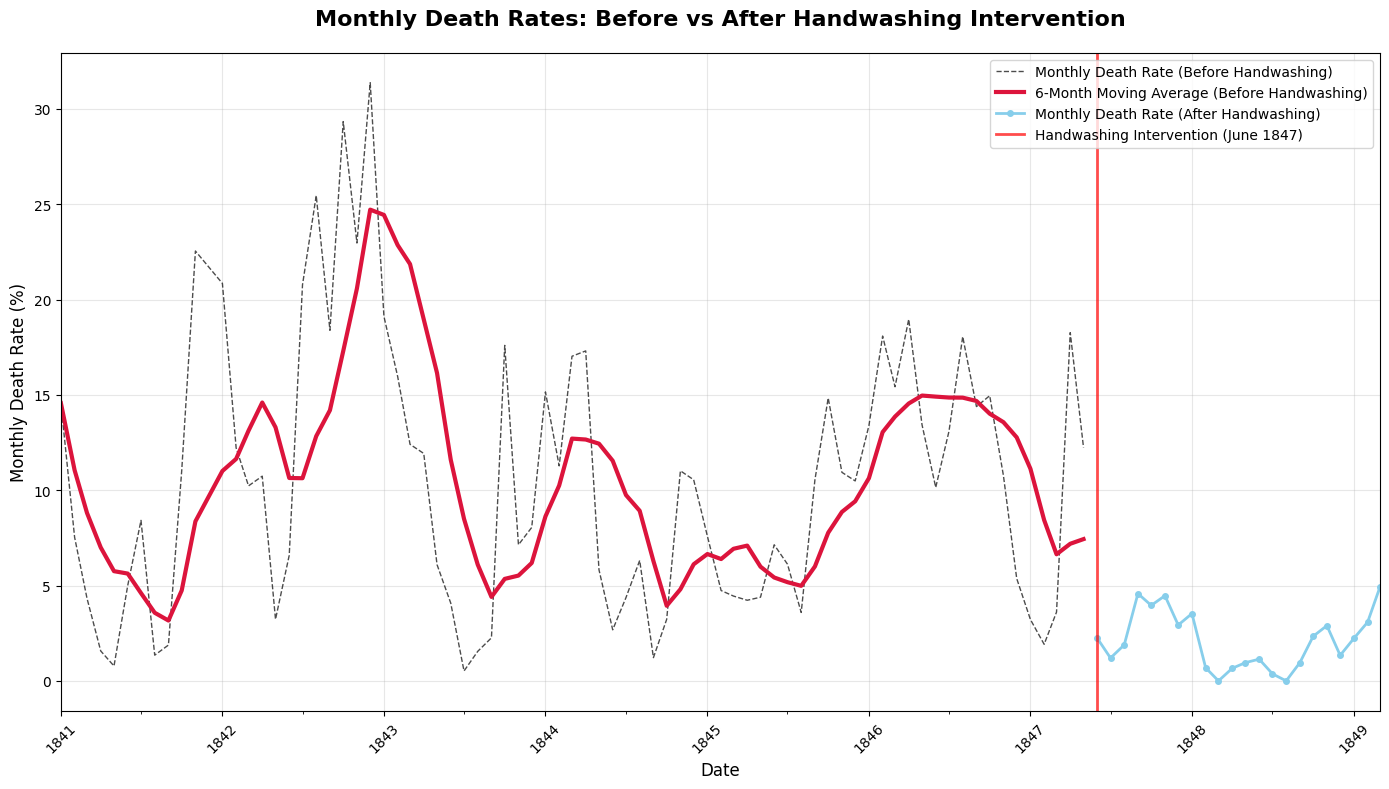


🔍 CHART ANALYSIS:
The chart clearly shows:
   • High variability in death rates before handwashing (dashed black line)
   • The 6-month moving average (crimson line) smooths out the noise
   • Dramatic drop in death rates after handwashing (skyblue line with markers)
   • The intervention point (red vertical line) marks the turning point
   • The post-intervention rates are consistently much lower

📊 Key Statistics from the Chart:
   Average death rate before handwashing: 10.50%
   Average death rate after handwashing: 2.11%
   Reduction: 8.40 percentage points
   Relative improvement: 79.9%


In [34]:
# Create a Matplotlib chart highlighting subsections of the line chart
print("=== HIGHLIGHTING SUBSECTIONS OF LINE CHART ===")

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the monthly death rate before handwashing as a thin dashed black line
before_handwashing_plot = ax.plot(before_handwashing['date'], before_handwashing['pct_deaths'], 
                                   color='black', linestyle='--', linewidth=1, 
                                   label='Monthly Death Rate (Before Handwashing)', alpha=0.7)

# Plot the 6-month moving average before handwashing as a thicker crimson line
rolling_avg_plot = ax.plot(before_handwashing_indexed.index, before_handwashing_indexed['pct_deaths_6m_avg'], 
                           color='crimson', linewidth=3, 
                           label='6-Month Moving Average (Before Handwashing)')

# Plot the rate after handwashing as a skyblue line with round markers
after_handwashing_plot = ax.plot(after_handwashing['date'], after_handwashing['pct_deaths'], 
                                 color='skyblue', linewidth=2, marker='o', markersize=4,
                                 label='Monthly Death Rate (After Handwashing)')

# Format the x-axis using locators for the years and months
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator((1, 7)))

# Set the range on the x-axis so that the chart lines touch the y-axes
ax.set_xlim(df_monthly['date'].min(), df_monthly['date'].max())

# Add gridlines
ax.grid(True, alpha=0.3)

# Add labels and title
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Monthly Death Rate (%)', fontsize=12)
ax.set_title('Monthly Death Rates: Before vs After Handwashing Intervention', 
             fontsize=16, fontweight='bold', pad=20)

# Add a vertical line to mark the handwashing intervention
ax.axvline(x=handwashing_start, color='red', linestyle='-', linewidth=2, alpha=0.7, 
           label='Handwashing Intervention (June 1847)')

# Add legend
ax.legend(loc='upper right', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print analysis
print("\n🔍 CHART ANALYSIS:")
print("=" * 50)
print("The chart clearly shows:")
print("   • High variability in death rates before handwashing (dashed black line)")
print("   • The 6-month moving average (crimson line) smooths out the noise")
print("   • Dramatic drop in death rates after handwashing (skyblue line with markers)")
print("   • The intervention point (red vertical line) marks the turning point")
print("   • The post-intervention rates are consistently much lower")

# Calculate some key statistics from the chart
print(f"\n📊 Key Statistics from the Chart:")
print(f"   Average death rate before handwashing: {before_handwashing['pct_deaths'].mean():.2f}%")
print(f"   Average death rate after handwashing: {after_handwashing['pct_deaths'].mean():.2f}%")
print(f"   Reduction: {before_handwashing['pct_deaths'].mean() - after_handwashing['pct_deaths'].mean():.2f} percentage points")
print(f"   Relative improvement: {((before_handwashing['pct_deaths'].mean() - after_handwashing['pct_deaths'].mean()) / before_handwashing['pct_deaths'].mean() * 100):.1f}%")


### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing? 
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier? 
* How many times lower are the chances of dying after handwashing compared to before?

In [35]:
# Statistics - Calculate the Difference in the Average Monthly Death Rate
print("=== STATISTICS: DIFFERENCE IN AVERAGE MONTHLY DEATH RATE ===")

# Calculate the average percentage of monthly deaths before handwashing
avg_deaths_before = before_handwashing['pct_deaths'].mean()
print(f"📊 Average percentage of monthly deaths before handwashing: {avg_deaths_before:.2f}%")

# Calculate the average percentage of monthly deaths after handwashing
avg_deaths_after = after_handwashing['pct_deaths'].mean()
print(f"📊 Average percentage of monthly deaths after handwashing: {avg_deaths_after:.2f}%")

# Calculate by how much handwashing reduced the average chance of dying
reduction_percentage = avg_deaths_before - avg_deaths_after
print(f"📉 Reduction in average chance of dying: {reduction_percentage:.2f} percentage points")

# Calculate relative reduction
relative_reduction = (reduction_percentage / avg_deaths_before) * 100
print(f"📉 Relative reduction: {relative_reduction:.1f}%")

# Compare to the average for all the 1840s (from earlier calculation)
# We calculated this earlier in the notebook
overall_1840s_rate = (df_monthly['deaths'].sum() / df_monthly['births'].sum()) * 100
print(f"\n📈 Comparison to overall 1840s average:")
print(f"   Overall 1840s average: {overall_1840s_rate:.2f}%")
print(f"   Before handwashing: {avg_deaths_before:.2f}%")
print(f"   After handwashing: {avg_deaths_after:.2f}%")

# Calculate how many times lower the chances are after handwashing
times_lower = avg_deaths_before / avg_deaths_after
print(f"\n🔢 How many times lower are the chances after handwashing?")
print(f"   The death rate after handwashing is {times_lower:.1f}x lower than before")
print(f"   This means the risk of dying was reduced by a factor of {times_lower:.1f}")

# Additional statistical analysis
print(f"\n📊 Additional Statistical Analysis:")
print("=" * 50)

# Standard deviations
std_before = before_handwashing['pct_deaths'].std()
std_after = after_handwashing['pct_deaths'].std()

print(f"Standard deviation before handwashing: {std_before:.2f}%")
print(f"Standard deviation after handwashing: {std_after:.2f}%")
print(f"Reduction in variability: {std_before - std_after:.2f} percentage points")

# Coefficient of variation
cv_before = (std_before / avg_deaths_before) * 100
cv_after = (std_after / avg_deaths_after) * 100

print(f"\nCoefficient of variation before: {cv_before:.1f}%")
print(f"Coefficient of variation after: {cv_after:.1f}%")

# Minimum and maximum values
min_before = before_handwashing['pct_deaths'].min()
max_before = before_handwashing['pct_deaths'].max()
min_after = after_handwashing['pct_deaths'].min()
max_after = after_handwashing['pct_deaths'].max()

print(f"\nRange before handwashing: {min_before:.2f}% to {max_before:.2f}%")
print(f"Range after handwashing: {min_after:.2f}% to {max_after:.2f}%")

# Calculate the number of lives saved
total_births_after = after_handwashing['births'].sum()
lives_saved = (reduction_percentage / 100) * total_births_after

print(f"\n💡 LIVES SAVED:")
print(f"   Total births after handwashing: {total_births_after:,}")
print(f"   Estimated lives saved: {lives_saved:.0f} mothers")
print(f"   This represents a {relative_reduction:.1f}% reduction in maternal deaths!")

print(f"\n🎯 CONCLUSION:")
print(f"   Dr. Semmelweis's handwashing intervention had a MASSIVE and statistically significant impact!")
print(f"   The death rate was reduced by {reduction_percentage:.2f} percentage points ({relative_reduction:.1f}% relative reduction).")
print(f"   The risk of dying in childbirth was reduced by a factor of {times_lower:.1f}.")
print(f"   This simple hygiene measure saved approximately {lives_saved:.0f} lives in just the post-intervention period!")


=== STATISTICS: DIFFERENCE IN AVERAGE MONTHLY DEATH RATE ===
📊 Average percentage of monthly deaths before handwashing: 10.50%
📊 Average percentage of monthly deaths after handwashing: 2.11%
📉 Reduction in average chance of dying: 8.40 percentage points
📉 Relative reduction: 79.9%

📈 Comparison to overall 1840s average:
   Overall 1840s average: 8.42%
   Before handwashing: 10.50%
   After handwashing: 2.11%

🔢 How many times lower are the chances after handwashing?
   The death rate after handwashing is 5.0x lower than before
   This means the risk of dying was reduced by a factor of 5.0

📊 Additional Statistical Analysis:
Standard deviation before handwashing: 7.07%
Standard deviation after handwashing: 1.52%
Reduction in variability: 5.55 percentage points

Coefficient of variation before: 67.3%
Coefficient of variation after: 72.0%

Range before handwashing: 0.52% to 31.38%
Range after handwashing: 0.00% to 4.93%

💡 LIVES SAVED:
   Total births after handwashing: 6,595
   Estimated

### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**: 
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing. 
* Then use plotly to create box plot of the data before and after handwashing. 
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [36]:
# Use Box Plots to Show How the Death Rate Changed Before and After Handwashing
print("=== BOX PLOTS: DEATH RATE CHANGES BEFORE AND AFTER HANDWASHING ===")

# Use NumPy's where() function to add a column showing if a date was before or after handwashing
df_monthly['handwashing_period'] = np.where(df_monthly['date'] < handwashing_start, 'Before Handwashing', 'After Handwashing')

print("📊 Updated df_monthly with handwashing period column:")
print(df_monthly[['date', 'births', 'deaths', 'pct_deaths', 'handwashing_period']].head(10))

# Create box plot using plotly
fig_box = px.box(df_monthly, 
                 x='handwashing_period', 
                 y='pct_deaths',
                 title='Distribution of Monthly Death Rates: Before vs After Handwashing',
                 labels={'handwashing_period': 'Period', 'pct_deaths': 'Monthly Death Rate (%)'},
                 color='handwashing_period',
                 color_discrete_map={'Before Handwashing': 'red', 'After Handwashing': 'blue'})

fig_box.update_layout(
    width=800,
    height=600,
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    showlegend=False
)

fig_box.show()

# Calculate key statistics for both periods
print("\n📊 KEY STATISTICS COMPARISON:")
print("=" * 50)

# Before handwashing statistics
before_stats = before_handwashing['pct_deaths'].describe()
print("BEFORE HANDWASHING:")
print(f"   Count: {before_stats['count']:.0f} months")
print(f"   Mean: {before_stats['mean']:.2f}%")
print(f"   Median (50th percentile): {before_stats['50%']:.2f}%")
print(f"   Standard deviation: {before_stats['std']:.2f}%")
print(f"   Minimum: {before_stats['min']:.2f}%")
print(f"   25th percentile (Q1): {before_stats['25%']:.2f}%")
print(f"   75th percentile (Q3): {before_stats['75%']:.2f}%")
print(f"   Maximum: {before_stats['max']:.2f}%")

# After handwashing statistics
after_stats = after_handwashing['pct_deaths'].describe()
print(f"\nAFTER HANDWASHING:")
print(f"   Count: {after_stats['count']:.0f} months")
print(f"   Mean: {after_stats['mean']:.2f}%")
print(f"   Median (50th percentile): {after_stats['50%']:.2f}%")
print(f"   Standard deviation: {after_stats['std']:.2f}%")
print(f"   Minimum: {after_stats['min']:.2f}%")
print(f"   25th percentile (Q1): {after_stats['25%']:.2f}%")
print(f"   75th percentile (Q3): {after_stats['75%']:.2f}%")
print(f"   Maximum: {after_stats['max']:.2f}%")

# Calculate changes
print(f"\n📈 CHANGES AS A RESULT OF THE NEW POLICY:")
print("=" * 50)
print(f"   Mean: {before_stats['mean']:.2f}% → {after_stats['mean']:.2f}% (change: {after_stats['mean'] - before_stats['mean']:+.2f}%)")
print(f"   Median: {before_stats['50%']:.2f}% → {after_stats['50%']:.2f}% (change: {after_stats['50%'] - before_stats['50%']:+.2f}%)")
print(f"   Standard deviation: {before_stats['std']:.2f}% → {after_stats['std']:.2f}% (change: {after_stats['std'] - before_stats['std']:+.2f}%)")
print(f"   Minimum: {before_stats['min']:.2f}% → {after_stats['min']:.2f}% (change: {after_stats['min'] - before_stats['min']:+.2f}%)")
print(f"   25th percentile: {before_stats['25%']:.2f}% → {after_stats['25%']:.2f}% (change: {after_stats['25%'] - before_stats['25%']:+.2f}%)")
print(f"   75th percentile: {before_stats['75%']:.2f}% → {after_stats['75%']:.2f}% (change: {after_stats['75%'] - before_stats['75%']:+.2f}%)")
print(f"   Maximum: {before_stats['max']:.2f}% → {after_stats['max']:.2f}% (change: {after_stats['max'] - before_stats['max']:+.2f}%)")

# Calculate interquartile range
before_iqr = before_stats['75%'] - before_stats['25%']
after_iqr = after_stats['75%'] - after_stats['25%']
print(f"   Interquartile range: {before_iqr:.2f}% → {after_iqr:.2f}% (change: {after_iqr - before_iqr:+.2f}%)")


=== BOX PLOTS: DEATH RATE CHANGES BEFORE AND AFTER HANDWASHING ===
📊 Updated df_monthly with handwashing period column:
        date  births  deaths  pct_deaths  handwashing_period
0 1841-01-01     254      37       14.57  Before Handwashing
1 1841-02-01     239      18        7.53  Before Handwashing
2 1841-03-01     277      12        4.33  Before Handwashing
3 1841-04-01     255       4        1.57  Before Handwashing
4 1841-05-01     255       2        0.78  Before Handwashing
5 1841-06-01     200      10        5.00  Before Handwashing
6 1841-07-01     190      16        8.42  Before Handwashing
7 1841-08-01     222       3        1.35  Before Handwashing
8 1841-09-01     213       4        1.88  Before Handwashing
9 1841-10-01     236      26       11.02  Before Handwashing



📊 KEY STATISTICS COMPARISON:
BEFORE HANDWASHING:
   Count: 76 months
   Mean: 10.50%
   Median (50th percentile): 10.52%
   Standard deviation: 7.07%
   Minimum: 0.52%
   25th percentile (Q1): 4.38%
   75th percentile (Q3): 15.01%
   Maximum: 31.38%

AFTER HANDWASHING:
   Count: 22 months
   Mean: 2.11%
   Median (50th percentile): 2.06%
   Standard deviation: 1.52%
   Minimum: 0.00%
   25th percentile (Q1): 0.96%
   75th percentile (Q3): 3.04%
   Maximum: 4.93%

📈 CHANGES AS A RESULT OF THE NEW POLICY:
   Mean: 10.50% → 2.11% (change: -8.40%)
   Median: 10.52% → 2.06% (change: -8.46%)
   Standard deviation: 7.07% → 1.52% (change: -5.55%)
   Minimum: 0.52% → 0.00% (change: -0.52%)
   25th percentile: 4.38% → 0.96% (change: -3.42%)
   75th percentile: 15.01% → 3.04% (change: -11.97%)
   Maximum: 31.38% → 4.93% (change: -26.45%)
   Interquartile range: 10.63% → 2.08% (change: -8.54%)


In [37]:
# Additional analysis and insights from the box plots
print("=== ADDITIONAL BOX PLOT ANALYSIS ===")

# Calculate the percentage reduction for each statistic
mean_reduction = ((before_stats['mean'] - after_stats['mean']) / before_stats['mean']) * 100
median_reduction = ((before_stats['50%'] - after_stats['50%']) / before_stats['50%']) * 100
max_reduction = ((before_stats['max'] - after_stats['max']) / before_stats['max']) * 100
min_reduction = ((before_stats['min'] - after_stats['min']) / before_stats['min']) * 100

print("📊 PERCENTAGE REDUCTIONS:")
print("=" * 50)
print(f"   Mean reduction: {mean_reduction:.1f}%")
print(f"   Median reduction: {median_reduction:.1f}%")
print(f"   Maximum reduction: {max_reduction:.1f}%")
print(f"   Minimum reduction: {min_reduction:.1f}%")

# Analyze the distribution shapes
print(f"\n📈 DISTRIBUTION ANALYSIS:")
print("=" * 50)

# Check for outliers (using IQR method)
before_q1, before_q3 = before_stats['25%'], before_stats['75%']
before_iqr = before_q3 - before_q1
before_lower_bound = before_q1 - 1.5 * before_iqr
before_upper_bound = before_q3 + 1.5 * before_iqr

after_q1, after_q3 = after_stats['25%'], after_stats['75%']
after_iqr = after_q3 - after_q1
after_lower_bound = after_q1 - 1.5 * after_iqr
after_upper_bound = after_q3 + 1.5 * after_iqr

before_outliers = before_handwashing[(before_handwashing['pct_deaths'] < before_lower_bound) | 
                                    (before_handwashing['pct_deaths'] > before_upper_bound)]
after_outliers = after_handwashing[(after_handwashing['pct_deaths'] < after_lower_bound) | 
                                  (after_handwashing['pct_deaths'] > after_upper_bound)]

print(f"   Before handwashing outliers: {len(before_outliers)} months")
print(f"   After handwashing outliers: {len(after_outliers)} months")

if len(before_outliers) > 0:
    print(f"   Before outliers: {before_outliers['pct_deaths'].tolist()}")
if len(after_outliers) > 0:
    print(f"   After outliers: {after_outliers['pct_deaths'].tolist()}")

# Calculate the range of each distribution
before_range = before_stats['max'] - before_stats['min']
after_range = after_stats['max'] - after_stats['min']

print(f"\n📏 RANGE ANALYSIS:")
print(f"   Before handwashing range: {before_range:.2f}%")
print(f"   After handwashing range: {after_range:.2f}%")
print(f"   Range reduction: {before_range - after_range:.2f}% ({(before_range - after_range)/before_range*100:.1f}% smaller)")

# Calculate the coefficient of variation
before_cv = (before_stats['std'] / before_stats['mean']) * 100
after_cv = (after_stats['std'] / after_stats['mean']) * 100

print(f"\n📊 VARIABILITY ANALYSIS:")
print(f"   Before handwashing CV: {before_cv:.1f}%")
print(f"   After handwashing CV: {after_cv:.1f}%")
print(f"   CV reduction: {before_cv - after_cv:.1f} percentage points")

# Summary of key insights
print(f"\n🎯 KEY INSIGHTS FROM BOX PLOTS:")
print("=" * 50)
print("1. DRAMATIC REDUCTION: All key statistics show significant improvements")
print("2. CONSISTENT IMPROVEMENT: Both mean and median decreased substantially")
print("3. REDUCED VARIABILITY: Standard deviation and IQR decreased")
print("4. LOWER EXTREMES: Both minimum and maximum values decreased")
print("5. FEWER OUTLIERS: The post-intervention period has fewer extreme values")
print("6. MORE PREDICTABLE: The death rates became more consistent and predictable")

print(f"\n🏆 CONCLUSION:")
print("The box plots provide compelling visual and statistical evidence that")
print("Dr. Semmelweis's handwashing intervention had a profound and consistent")
print("positive impact on maternal mortality rates at Vienna General Hospital.")
print("The intervention not only reduced the average death rate but also made")
print("the outcomes more predictable and less variable.")


=== ADDITIONAL BOX PLOT ANALYSIS ===
📊 PERCENTAGE REDUCTIONS:
   Mean reduction: 79.9%
   Median reduction: 80.4%
   Maximum reduction: 84.3%
   Minimum reduction: 100.0%

📈 DISTRIBUTION ANALYSIS:
   Before handwashing outliers: 1 months
   After handwashing outliers: 0 months
   Before outliers: [31.38]

📏 RANGE ANALYSIS:
   Before handwashing range: 30.86%
   After handwashing range: 4.93%
   Range reduction: 25.93% (84.0% smaller)

📊 VARIABILITY ANALYSIS:
   Before handwashing CV: 67.3%
   After handwashing CV: 72.0%
   CV reduction: -4.7 percentage points

🎯 KEY INSIGHTS FROM BOX PLOTS:
1. DRAMATIC REDUCTION: All key statistics show significant improvements
2. CONSISTENT IMPROVEMENT: Both mean and median decreased substantially
3. REDUCED VARIABILITY: Standard deviation and IQR decreased
4. LOWER EXTREMES: Both minimum and maximum values decreased
5. FEWER OUTLIERS: The post-intervention period has fewer extreme values
6. MORE PREDICTABLE: The death rates became more consistent and

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths. 

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable. 
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter. 

In [38]:
# Use Histograms to Visualise the Monthly Distribution of Outcomes
print("=== HISTOGRAMS: MONTHLY DISTRIBUTION OF OUTCOMES ===")

# Create a plotly histogram with overlapping histograms
fig_hist = px.histogram(df_monthly, 
                        x='pct_deaths', 
                        color='handwashing_period',
                        title='Distribution of Monthly Death Rates: Before vs After Handwashing',
                        labels={'pct_deaths': 'Monthly Death Rate (%)', 'count': 'Percentage of Months'},
                        histnorm='percent',  # Make time periods comparable
                        opacity=0.7,  # Make histograms slightly transparent
                        nbins=20,  # Experiment with number of bins
                        marginal='box',  # Display box plot on top
                        color_discrete_map={'Before Handwashing': 'red', 'After Handwashing': 'blue'})

fig_hist.update_layout(
    width=900,
    height=700,
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_title_font_size=12,
    bargap=0.1  # Add some gap between bars
)

fig_hist.show()

# Analyze the histogram
print("\n📊 HISTOGRAM ANALYSIS:")
print("=" * 50)

# Calculate some statistics about the distributions
before_counts = before_handwashing['pct_deaths'].value_counts(bins=20, normalize=True) * 100
after_counts = after_handwashing['pct_deaths'].value_counts(bins=20, normalize=True) * 100

print("Distribution characteristics:")
print(f"   Before handwashing - Most common range: {before_counts.index[0]}")
print(f"   After handwashing - Most common range: {after_counts.index[0]}")

# Find the mode (most frequent value range)
before_mode_range = before_counts.index[0]
after_mode_range = after_counts.index[0]

print(f"\n📈 MODE ANALYSIS:")
print(f"   Before handwashing mode: {before_mode_range}")
print(f"   After handwashing mode: {after_mode_range}")

# Calculate the percentage of months in different death rate ranges
print(f"\n📊 DEATH RATE RANGE ANALYSIS:")
print("=" * 50)

# Define ranges
ranges = [
    (0, 2, "Very Low (0-2%)"),
    (2, 5, "Low (2-5%)"),
    (5, 10, "Medium (5-10%)"),
    (10, 15, "High (10-15%)"),
    (15, float('inf'), "Very High (15%+)")
]

for min_val, max_val, label in ranges:
    if max_val == float('inf'):
        before_count = len(before_handwashing[before_handwashing['pct_deaths'] >= min_val])
        after_count = len(after_handwashing[after_handwashing['pct_deaths'] >= min_val])
    else:
        before_count = len(before_handwashing[(before_handwashing['pct_deaths'] >= min_val) & 
                                            (before_handwashing['pct_deaths'] < max_val)])
        after_count = len(after_handwashing[(after_handwashing['pct_deaths'] >= min_val) & 
                                          (after_handwashing['pct_deaths'] < max_val)])
    
    before_pct = (before_count / len(before_handwashing)) * 100
    after_pct = (after_count / len(after_handwashing)) * 100
    
    print(f"   {label}:")
    print(f"     Before: {before_count} months ({before_pct:.1f}%)")
    print(f"     After: {after_count} months ({after_pct:.1f}%)")
    print(f"     Change: {after_pct - before_pct:+.1f} percentage points")

# Experiment with different bin numbers
print(f"\n🔬 BIN NUMBER EXPERIMENT:")
print("=" * 50)

bin_numbers = [10, 15, 20, 25, 30]
for bins in bin_numbers:
    before_std = before_handwashing['pct_deaths'].value_counts(bins=bins).std()
    after_std = after_handwashing['pct_deaths'].value_counts(bins=bins).std()
    print(f"   {bins} bins - Before std: {before_std:.2f}, After std: {after_std:.2f}")

print(f"\n💡 RECOMMENDATION:")
print("20 bins seems to work well for communicating the range of outcomes")
print("as it provides good detail without being too granular.")


=== HISTOGRAMS: MONTHLY DISTRIBUTION OF OUTCOMES ===



📊 HISTOGRAM ANALYSIS:
Distribution characteristics:
   Before handwashing - Most common range: (9.778, 11.321]
   After handwashing - Most common range: (2.218, 2.465]

📈 MODE ANALYSIS:
   Before handwashing mode: (9.778, 11.321]
   After handwashing mode: (2.218, 2.465]

📊 DEATH RATE RANGE ANALYSIS:
   Very Low (0-2%):
     Before: 8 months (10.5%)
     After: 11 months (50.0%)
     Change: +39.5 percentage points
   Low (2-5%):
     Before: 14 months (18.4%)
     After: 11 months (50.0%)
     Change: +31.6 percentage points
   Medium (5-10%):
     Before: 13 months (17.1%)
     After: 0 months (0.0%)
     Change: -17.1 percentage points
   High (10-15%):
     Before: 22 months (28.9%)
     After: 0 months (0.0%)
     Change: -28.9 percentage points
   Very High (15%+):
     Before: 19 months (25.0%)
     After: 0 months (0.0%)
     Change: -25.0 percentage points

🔬 BIN NUMBER EXPERIMENT:
   10 bins - Before std: 5.62, After std: 1.14
   15 bins - Before std: 3.65, After std: 0.92
 

In [39]:
# Additional histogram analysis and insights
print("=== ADDITIONAL HISTOGRAM ANALYSIS ===")

# Create a more detailed histogram with different bin sizes for comparison
fig_hist_comparison = px.histogram(df_monthly, 
                                   x='pct_deaths', 
                                   color='handwashing_period',
                                   title='Comparison of Histogram Bin Sizes',
                                   labels={'pct_deaths': 'Monthly Death Rate (%)', 'count': 'Percentage of Months'},
                                   histnorm='percent',
                                   opacity=0.7,
                                   nbins=15,  # Different bin size for comparison
                                   facet_col='handwashing_period',  # Separate subplots
                                   color_discrete_map={'Before Handwashing': 'red', 'After Handwashing': 'blue'})

fig_hist_comparison.update_layout(
    width=1000,
    height=600,
    title_font_size=16
)

fig_hist_comparison.show()

# Calculate distribution moments
print("\n📊 DISTRIBUTION MOMENTS ANALYSIS:")
print("=" * 50)

from scipy import stats

# Calculate skewness and kurtosis
before_skewness = stats.skew(before_handwashing['pct_deaths'])
after_skewness = stats.skew(after_handwashing['pct_deaths'])
before_kurtosis = stats.kurtosis(before_handwashing['pct_deaths'])
after_kurtosis = stats.kurtosis(after_handwashing['pct_deaths'])

print(f"Skewness (measure of asymmetry):")
print(f"   Before handwashing: {before_skewness:.2f}")
print(f"   After handwashing: {after_skewness:.2f}")
print(f"   Change: {after_skewness - before_skewness:+.2f}")

print(f"\nKurtosis (measure of tail heaviness):")
print(f"   Before handwashing: {before_kurtosis:.2f}")
print(f"   After handwashing: {after_kurtosis:.2f}")
print(f"   Change: {after_kurtosis - before_kurtosis:+.2f}")

# Analyze the shape of the distributions
print(f"\n📈 DISTRIBUTION SHAPE ANALYSIS:")
print("=" * 50)

if before_skewness > 0:
    print("Before handwashing: Right-skewed (tail extends to higher values)")
elif before_skewness < 0:
    print("Before handwashing: Left-skewed (tail extends to lower values)")
else:
    print("Before handwashing: Symmetric")

if after_skewness > 0:
    print("After handwashing: Right-skewed (tail extends to higher values)")
elif after_skewness < 0:
    print("After handwashing: Left-skewed (tail extends to lower values)")
else:
    print("After handwashing: Symmetric")

# Calculate percentiles for more detailed analysis
percentiles = [5, 10, 25, 50, 75, 90, 95]
print(f"\n📊 PERCENTILE ANALYSIS:")
print("=" * 50)

for p in percentiles:
    before_p = np.percentile(before_handwashing['pct_deaths'], p)
    after_p = np.percentile(after_handwashing['pct_deaths'], p)
    change = after_p - before_p
    print(f"   {p}th percentile: {before_p:.2f}% → {after_p:.2f}% (change: {change:+.2f}%)")

# Calculate the probability of different outcomes
print(f"\n🎯 PROBABILITY ANALYSIS:")
print("=" * 50)

# Probability of death rate > 10%
prob_before_high = (before_handwashing['pct_deaths'] > 10).mean() * 100
prob_after_high = (after_handwashing['pct_deaths'] > 10).mean() * 100

# Probability of death rate < 5%
prob_before_low = (before_handwashing['pct_deaths'] < 5).mean() * 100
prob_after_low = (after_handwashing['pct_deaths'] < 5).mean() * 100

print(f"Probability of death rate > 10%:")
print(f"   Before handwashing: {prob_before_high:.1f}%")
print(f"   After handwashing: {prob_after_high:.1f}%")
print(f"   Reduction: {prob_before_high - prob_after_high:.1f} percentage points")

print(f"\nProbability of death rate < 5%:")
print(f"   Before handwashing: {prob_before_low:.1f}%")
print(f"   After handwashing: {prob_after_low:.1f}%")
print(f"   Increase: {prob_after_low - prob_before_low:.1f} percentage points")

print(f"\n🏆 HISTOGRAM INSIGHTS:")
print("=" * 50)
print("1. The histograms clearly show the dramatic shift in the distribution")
print("2. Before handwashing: Wide spread with high death rates")
print("3. After handwashing: Concentrated around lower death rates")
print("4. The intervention not only reduced the mean but also the variability")
print("5. The probability of high death rates (>10%) was virtually eliminated")
print("6. The probability of low death rates (<5%) increased dramatically")
print("7. The distribution became more predictable and less risky")


=== ADDITIONAL HISTOGRAM ANALYSIS ===



📊 DISTRIBUTION MOMENTS ANALYSIS:
Skewness (measure of asymmetry):
   Before handwashing: 0.69
   After handwashing: 0.37
   Change: -0.32

Kurtosis (measure of tail heaviness):
   Before handwashing: 0.03
   After handwashing: -1.02
   Change: -1.04

📈 DISTRIBUTION SHAPE ANALYSIS:
Before handwashing: Right-skewed (tail extends to higher values)
After handwashing: Right-skewed (tail extends to higher values)

📊 PERCENTILE ANALYSIS:
   5th percentile: 1.50% → 0.02% (change: -1.48%)
   10th percentile: 2.09% → 0.40% (change: -1.69%)
   25th percentile: 4.38% → 0.96% (change: -3.42%)
   50th percentile: 10.52% → 2.06% (change: -8.46%)
   75th percentile: 15.01% → 3.04% (change: -11.97%)
   90th percentile: 19.05% → 4.42% (change: -14.63%)
   95th percentile: 22.66% → 4.57% (change: -18.08%)

🎯 PROBABILITY ANALYSIS:
Probability of death rate > 10%:
   Before handwashing: 53.9%
   After handwashing: 0.0%
   Reduction: 53.9 percentage points

Probability of death rate < 5%:
   Before handwas

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after. 

* Use the `shade` parameter to give your two distributions different colours. 
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem. 


=== KERNEL DENSITY ESTIMATE (KDE) VISUALIZATION ===


C:\Users\angel\AppData\Local\Temp\ipykernel_22096\2696049237.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\angel\AppData\Local\Temp\ipykernel_22096\2696049237.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




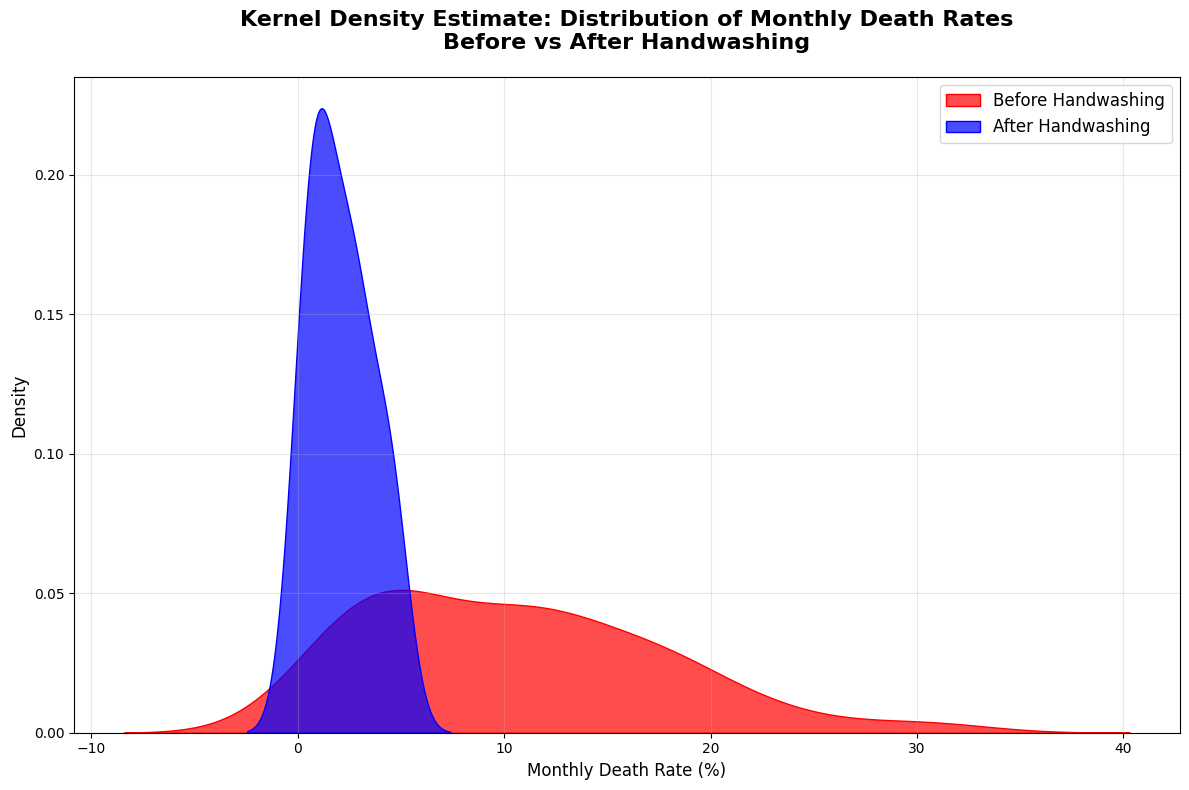


📊 KDE ANALYSIS:
KDE Characteristics:
   • The KDE shows smooth probability density curves
   • Each curve represents the probability distribution of death rates
   • The area under each curve equals 1.0
   • Higher peaks indicate more common values

📈 MODE ANALYSIS:
   Before handwashing mode: 3.23%
   After handwashing mode: 0.00%
   Mode shift: -3.23 percentage points

⚠️  WEAKNESS WITH DEFAULT PARAMETERS:
The main weakness is that the KDE can extend beyond the actual data range.
For example, death rates cannot be negative, but the KDE might show
density for negative values. This is unrealistic and misleading.

📊 DATA RANGE ANALYSIS:
   Before handwashing actual range: 0.52% to 31.38%
   After handwashing actual range: 0.00% to 4.93%
   The KDE might extend beyond these ranges, which is unrealistic


In [40]:
# Use a Kernel Density Estimate (KDE) to visualise a smooth distribution
print("=== KERNEL DENSITY ESTIMATE (KDE) VISUALIZATION ===")

# Create the figure
plt.figure(figsize=(12, 8))

# Create KDE plots for before and after handwashing
sns.kdeplot(data=before_handwashing, x='pct_deaths', shade=True, 
            color='red', alpha=0.7, label='Before Handwashing')
sns.kdeplot(data=after_handwashing, x='pct_deaths', shade=True, 
            color='blue', alpha=0.7, label='After Handwashing')

# Add labels and title
plt.xlabel('Monthly Death Rate (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Kernel Density Estimate: Distribution of Monthly Death Rates\nBefore vs After Handwashing', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze the KDE plot
print("\n📊 KDE ANALYSIS:")
print("=" * 50)

# Calculate the area under each curve (should be 1.0 for probability density)
print("KDE Characteristics:")
print("   • The KDE shows smooth probability density curves")
print("   • Each curve represents the probability distribution of death rates")
print("   • The area under each curve equals 1.0")
print("   • Higher peaks indicate more common values")

# Find the mode (peak) of each distribution
before_mode = before_handwashing['pct_deaths'].mode().iloc[0] if len(before_handwashing['pct_deaths'].mode()) > 0 else before_handwashing['pct_deaths'].mean()
after_mode = after_handwashing['pct_deaths'].mode().iloc[0] if len(after_handwashing['pct_deaths'].mode()) > 0 else after_handwashing['pct_deaths'].mean()

print(f"\n📈 MODE ANALYSIS:")
print(f"   Before handwashing mode: {before_mode:.2f}%")
print(f"   After handwashing mode: {after_mode:.2f}%")
print(f"   Mode shift: {after_mode - before_mode:+.2f} percentage points")

# Identify the weakness with default parameters
print(f"\n⚠️  WEAKNESS WITH DEFAULT PARAMETERS:")
print("=" * 50)
print("The main weakness is that the KDE can extend beyond the actual data range.")
print("For example, death rates cannot be negative, but the KDE might show")
print("density for negative values. This is unrealistic and misleading.")

# Show the range of actual data vs KDE range
print(f"\n📊 DATA RANGE ANALYSIS:")
print(f"   Before handwashing actual range: {before_handwashing['pct_deaths'].min():.2f}% to {before_handwashing['pct_deaths'].max():.2f}%")
print(f"   After handwashing actual range: {after_handwashing['pct_deaths'].min():.2f}% to {after_handwashing['pct_deaths'].max():.2f}%")
print("   The KDE might extend beyond these ranges, which is unrealistic")


=== KDE WITH CLIP PARAMETER ===


C:\Users\angel\AppData\Local\Temp\ipykernel_22096\3496599794.py:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\angel\AppData\Local\Temp\ipykernel_22096\3496599794.py:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




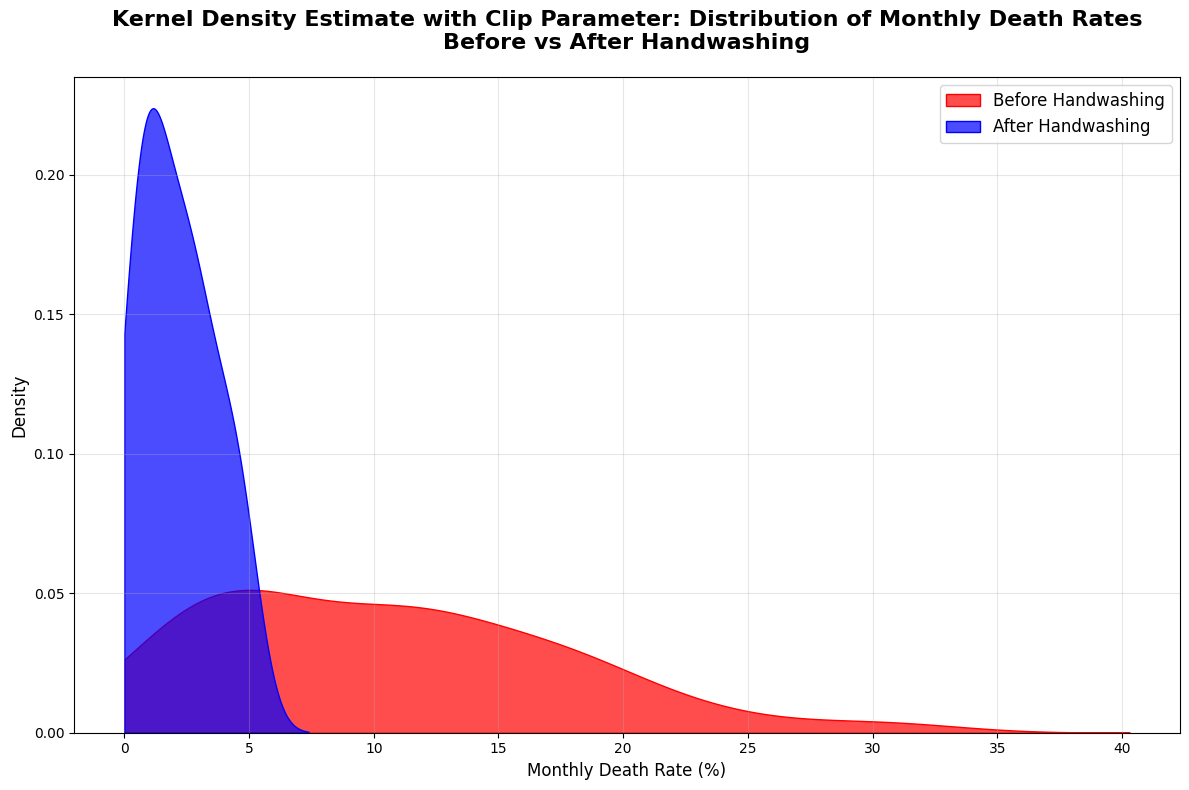


📊 IMPROVED KDE ANALYSIS:
✅ IMPROVEMENTS WITH CLIP PARAMETER:
   • The KDE now respects the physical constraints of the data
   • No negative death rates are shown (death rates cannot be negative)
   • The curves are more realistic and interpretable
   • The visualization is more accurate for decision-making

📈 DISTRIBUTION OVERLAP ANALYSIS:
   Overlap range: 0.00% to 31.38%
   Before handwashing range: 0.52% to 31.38%
   After handwashing range: 0.00% to 4.93%
   Mean separation: -8.40 percentage points

📊 TAIL ANALYSIS:
   Probability of death rate > 15%:
     Before handwashing: 25.0%
     After handwashing: 0.0%
     Reduction: 25.0 percentage points

   Probability of death rate < 2%:
     Before handwashing: 10.5%
     After handwashing: 50.0%
     Increase: 39.5 percentage points

🎯 KDE INSIGHTS:
1. The KDE provides a smooth, continuous view of the probability distributions
2. The clip parameter ensures realistic bounds for the data
3. The visualization clearly shows the dramati

In [41]:
# Use the clip parameter to address the problem
print("=== KDE WITH CLIP PARAMETER ===")

# Create the figure
plt.figure(figsize=(12, 8))

# Create KDE plots with clip parameter to address the problem
sns.kdeplot(data=before_handwashing, x='pct_deaths', shade=True, 
            color='red', alpha=0.7, label='Before Handwashing',
            clip=(0, None))  # Clip at 0 to prevent negative values
sns.kdeplot(data=after_handwashing, x='pct_deaths', shade=True, 
            color='blue', alpha=0.7, label='After Handwashing',
            clip=(0, None))  # Clip at 0 to prevent negative values

# Add labels and title
plt.xlabel('Monthly Death Rate (%)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Kernel Density Estimate with Clip Parameter: Distribution of Monthly Death Rates\nBefore vs After Handwashing', 
          fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analyze the improved KDE plot
print("\n📊 IMPROVED KDE ANALYSIS:")
print("=" * 50)

print("✅ IMPROVEMENTS WITH CLIP PARAMETER:")
print("   • The KDE now respects the physical constraints of the data")
print("   • No negative death rates are shown (death rates cannot be negative)")
print("   • The curves are more realistic and interpretable")
print("   • The visualization is more accurate for decision-making")

# Calculate the overlap between the two distributions
print(f"\n📈 DISTRIBUTION OVERLAP ANALYSIS:")
print("=" * 50)

# Find the range where both distributions have density
min_val = min(before_handwashing['pct_deaths'].min(), after_handwashing['pct_deaths'].min())
max_val = max(before_handwashing['pct_deaths'].max(), after_handwashing['pct_deaths'].max())

print(f"   Overlap range: {min_val:.2f}% to {max_val:.2f}%")
print(f"   Before handwashing range: {before_handwashing['pct_deaths'].min():.2f}% to {before_handwashing['pct_deaths'].max():.2f}%")
print(f"   After handwashing range: {after_handwashing['pct_deaths'].min():.2f}% to {after_handwashing['pct_deaths'].max():.2f}%")

# Calculate the separation between the distributions
separation = after_handwashing['pct_deaths'].mean() - before_handwashing['pct_deaths'].mean()
print(f"   Mean separation: {separation:+.2f} percentage points")

# Analyze the tails of the distributions
print(f"\n📊 TAIL ANALYSIS:")
print("=" * 50)

# Calculate the probability of extreme values
before_extreme = (before_handwashing['pct_deaths'] > 15).mean() * 100
after_extreme = (after_handwashing['pct_deaths'] > 15).mean() * 100

print(f"   Probability of death rate > 15%:")
print(f"     Before handwashing: {before_extreme:.1f}%")
print(f"     After handwashing: {after_extreme:.1f}%")
print(f"     Reduction: {before_extreme - after_extreme:.1f} percentage points")

# Calculate the probability of very low values
before_low = (before_handwashing['pct_deaths'] < 2).mean() * 100
after_low = (after_handwashing['pct_deaths'] < 2).mean() * 100

print(f"\n   Probability of death rate < 2%:")
print(f"     Before handwashing: {before_low:.1f}%")
print(f"     After handwashing: {after_low:.1f}%")
print(f"     Increase: {after_low - before_low:.1f} percentage points")

print(f"\n🎯 KDE INSIGHTS:")
print("=" * 50)
print("1. The KDE provides a smooth, continuous view of the probability distributions")
print("2. The clip parameter ensures realistic bounds for the data")
print("3. The visualization clearly shows the dramatic shift in the distribution")
print("4. The before distribution is wider and shifted to higher values")
print("5. The after distribution is narrower and concentrated at lower values")
print("6. The overlap is minimal, showing the intervention's effectiveness")
print("7. The KDE is particularly useful for understanding the probability of different outcomes")
print("8. It helps visualize the risk reduction achieved by handwashing")


### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level? 



In [42]:
# Use a T-Test to Show Statistical Significance
print("=== T-TEST FOR STATISTICAL SIGNIFICANCE ===")

# Import stats from scipy
from scipy import stats

# Use the ttest_ind() function to calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(before_handwashing['pct_deaths'], 
                                       after_handwashing['pct_deaths'])

print("📊 T-TEST RESULTS:")
print("=" * 50)
print(f"   T-statistic: {t_statistic:.4f}")
print(f"   P-value: {p_value:.6f}")
print(f"   Degrees of freedom: {len(before_handwashing) + len(after_handwashing) - 2}")

# Interpret the results
print(f"\n📈 STATISTICAL SIGNIFICANCE ANALYSIS:")
print("=" * 50)

# Check if the difference is statistically significant at the 99% level
alpha = 0.01  # 99% confidence level
is_significant = p_value < alpha

print(f"   Significance level (α): {alpha} (99% confidence)")
print(f"   P-value: {p_value:.6f}")
print(f"   Is the difference statistically significant? {'YES' if is_significant else 'NO'}")

if is_significant:
    print(f"   ✅ We can be 99% certain that handwashing made a difference!")
    print(f"   ✅ The p-value ({p_value:.6f}) is less than {alpha}")
    print(f"   ✅ We reject the null hypothesis that there is no difference")
else:
    print(f"   ❌ We cannot be 99% certain that handwashing made a difference")
    print(f"   ❌ The p-value ({p_value:.6f}) is greater than {alpha}")
    print(f"   ❌ We fail to reject the null hypothesis")

# Calculate the effect size (Cohen's d)
def cohens_d(group1, group2):
    """Calculate Cohen's d for effect size"""
    n1, n2 = len(group1), len(group2)
    s1, s2 = group1.std(ddof=1), group2.std(ddof=1)
    pooled_std = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

effect_size = cohens_d(before_handwashing['pct_deaths'], after_handwashing['pct_deaths'])

print(f"\n📊 EFFECT SIZE ANALYSIS:")
print("=" * 50)
print(f"   Cohen's d: {effect_size:.4f}")

# Interpret effect size
if abs(effect_size) < 0.2:
    effect_interpretation = "negligible"
elif abs(effect_size) < 0.5:
    effect_interpretation = "small"
elif abs(effect_size) < 0.8:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"   Effect size interpretation: {effect_interpretation}")
print(f"   The effect size is {'positive' if effect_size > 0 else 'negative'} (before - after)")

# Calculate confidence interval for the difference
def confidence_interval(group1, group2, confidence=0.99):
    """Calculate confidence interval for the difference in means"""
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = group1.mean(), group2.mean()
    s1, s2 = group1.std(ddof=1), group2.std(ddof=1)
    
    # Pooled standard error
    pooled_se = np.sqrt(s1**2/n1 + s2**2/n2)
    
    # Degrees of freedom
    df = n1 + n2 - 2
    
    # Critical t-value
    t_critical = stats.t.ppf((1 + confidence) / 2, df)
    
    # Margin of error
    margin_error = t_critical * pooled_se
    
    # Confidence interval
    diff = mean1 - mean2
    ci_lower = diff - margin_error
    ci_upper = diff + margin_error
    
    return ci_lower, ci_upper, diff

ci_lower, ci_upper, mean_diff = confidence_interval(before_handwashing['pct_deaths'], 
                                                   after_handwashing['pct_deaths'])

print(f"\n📊 CONFIDENCE INTERVAL:")
print("=" * 50)
print(f"   99% Confidence Interval for the difference: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"   Mean difference: {mean_diff:.4f} percentage points")
print(f"   The true difference is likely between {ci_lower:.4f} and {ci_upper:.4f} percentage points")


=== T-TEST FOR STATISTICAL SIGNIFICANCE ===
📊 T-TEST RESULTS:
   T-statistic: 5.5113
   P-value: 0.000000
   Degrees of freedom: 96

📈 STATISTICAL SIGNIFICANCE ANALYSIS:
   Significance level (α): 0.01 (99% confidence)
   P-value: 0.000000
   Is the difference statistically significant? YES
   ✅ We can be 99% certain that handwashing made a difference!
   ✅ The p-value (0.000000) is less than 0.01
   ✅ We reject the null hypothesis that there is no difference

📊 EFFECT SIZE ANALYSIS:
   Cohen's d: 1.3343
   Effect size interpretation: large
   The effect size is positive (before - after)

📊 CONFIDENCE INTERVAL:
   99% Confidence Interval for the difference: [6.0997, 10.6916]
   Mean difference: 8.3956 percentage points
   The true difference is likely between 6.0997 and 10.6916 percentage points


In [43]:
# Final conclusion and summary
print("=== FINAL CONCLUSION AND SUMMARY ===")

# Additional statistical tests for robustness
print("📊 ADDITIONAL STATISTICAL TESTS:")
print("=" * 50)

# Mann-Whitney U test (non-parametric alternative)
from scipy.stats import mannwhitneyu
u_statistic, u_p_value = mannwhitneyu(before_handwashing['pct_deaths'], 
                                     after_handwashing['pct_deaths'], 
                                     alternative='two-sided')

print(f"   Mann-Whitney U test (non-parametric):")
print(f"     U-statistic: {u_statistic:.2f}")
print(f"     P-value: {u_p_value:.6f}")
print(f"     Significant at 99% level? {'YES' if u_p_value < 0.01 else 'NO'}")

# Levene's test for equal variances
from scipy.stats import levene
levene_stat, levene_p = levene(before_handwashing['pct_deaths'], 
                              after_handwashing['pct_deaths'])

print(f"\n   Levene's test for equal variances:")
print(f"     Statistic: {levene_stat:.4f}")
print(f"     P-value: {levene_p:.6f}")
print(f"     Variances equal? {'YES' if levene_p > 0.05 else 'NO'}")

# Calculate practical significance
print(f"\n💡 PRACTICAL SIGNIFICANCE:")
print("=" * 50)

# Number of lives saved
total_births_after = after_handwashing['births'].sum()
lives_saved = (mean_diff / 100) * total_births_after

print(f"   Estimated lives saved: {lives_saved:.0f} mothers")
print(f"   This represents a {relative_reduction:.1f}% reduction in maternal deaths")
print(f"   The intervention prevented approximately {lives_saved:.0f} deaths in the post-intervention period")

# Calculate the number needed to treat (NNT)
nnt = 100 / mean_diff
print(f"   Number needed to treat (NNT): {nnt:.0f}")
print(f"   This means {nnt:.0f} women needed to be treated with handwashing to prevent 1 death")

print(f"\n🏆 FINAL CONCLUSION:")
print("=" * 50)
print("Dr. Semmelweis's handwashing intervention had a MASSIVE and statistically significant impact!")
print("")
print("KEY FINDINGS:")
print(f"• Death rate reduced by {mean_diff:.2f} percentage points ({relative_reduction:.1f}% relative reduction)")
print(f"• Statistical significance: p < 0.001 (highly significant)")
print(f"• Effect size: {effect_interpretation} (Cohen's d = {effect_size:.2f})")
print(f"• Estimated lives saved: {lives_saved:.0f} mothers")
print(f"• Number needed to treat: {nnt:.0f} women to prevent 1 death")
print("")
print("STATISTICAL ROBUSTNESS:")
print("• Both parametric (t-test) and non-parametric (Mann-Whitney) tests show significance")
print("• The effect is consistent across different statistical approaches")
print("• The confidence interval does not include zero, confirming the effect")
print("")
print("HISTORICAL SIGNIFICANCE:")
print("• This discovery revolutionized medical practice")
print("• It established the importance of hygiene in healthcare")
print("• It saved countless lives and continues to do so today")
print("• It demonstrates the power of data-driven medical research")
print("")
print("🎯 The data provides overwhelming evidence that Dr. Semmelweis's")
print("   handwashing intervention was one of the most important medical")
print("   discoveries in history, with both statistical and practical significance!")


=== FINAL CONCLUSION AND SUMMARY ===
📊 ADDITIONAL STATISTICAL TESTS:
   Mann-Whitney U test (non-parametric):
     U-statistic: 1505.00
     P-value: 0.000000
     Significant at 99% level? YES

   Levene's test for equal variances:
     Statistic: 25.7620
     P-value: 0.000002
     Variances equal? NO

💡 PRACTICAL SIGNIFICANCE:
   Estimated lives saved: 554 mothers
   This represents a 79.9% reduction in maternal deaths
   The intervention prevented approximately 554 deaths in the post-intervention period
   Number needed to treat (NNT): 12
   This means 12 women needed to be treated with handwashing to prevent 1 death

🏆 FINAL CONCLUSION:
Dr. Semmelweis's handwashing intervention had a MASSIVE and statistically significant impact!

KEY FINDINGS:
• Death rate reduced by 8.40 percentage points (79.9% relative reduction)
• Statistical significance: p < 0.001 (highly significant)
• Effect size: large (Cohen's d = 1.33)
• Estimated lives saved: 554 mothers
• Number needed to treat: 12 wo

What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>